In [ ]:
!pip install scikit-learn sentence-transformers plotly

In [56]:
import pandas as pd
import os
from pathlib import Path


In [58]:

# Define the path and file names
base_path = "/Users/vinitavader/Desktop/WJC/Vinita/annotation_task_data"
files = [
    "topic_labeling_pilot_Brazil.xlsx",
    "topic_labeling_pilot_China_Xiawei.xlsx",
    "topic_labeling_pilot_China_Xinyi.xlsx",
    "topic_labeling_pilot_Poland.xlsx"
]

# Define the columns we want to extract
target_columns = [
    "Label_1", "Label_1_Reason", 
    "Label_2", "Label_2_Reason", 
    "Label_3", "Label_3_Reason"
]

# Dictionary to store data for each topic
all_topics_data = {}

# Track which files were successfully processed
processed_files = []
failed_files = []

# Process each file
for file in files:
    file_path = os.path.join(base_path, file)
    
    # Extract annotator name FROM THE FILENAME ONLY
    if "Brazil" in file:
        annotator = "Brazil"
    elif "China_Xiawei" in file:
        annotator = "China_Xiawei"
    elif "China_Xinyi" in file:
        annotator = "China_Xinyi"
    elif "Poland" in file:
        annotator = "Poland"
    
    print(f"\nProcessing {file} (Annotator: {annotator})...")
    
    try:
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"  ERROR: File does not exist at {file_path}")
            failed_files.append(file)
            continue
            
        # Read all sheets from the Excel file
        excel_file = pd.ExcelFile(file_path)
        print(f"  Found sheets: {excel_file.sheet_names}")
        
        topics_found = 0
        
        # Process each topic sheet
        for sheet_name in excel_file.sheet_names:
            if sheet_name.startswith("Topic_"):
                # Read the sheet
                df = pd.read_excel(file_path, sheet_name=sheet_name)
                
                # Check if dataframe is empty
                if df.empty:
                    print(f"  WARNING: {sheet_name} is empty!")
                    continue
                
                # Check if all required columns exist
                missing_cols = [col for col in target_columns if col not in df.columns]
                if missing_cols:
                    print(f"  Warning: Missing columns in {sheet_name}: {missing_cols}")
                    # Create empty columns for missing ones
                    for col in missing_cols:
                        df[col] = ""
                
                # Extract the required columns (first row only)
                row_data = df[target_columns].iloc[0:1].copy()
                
                # Add the annotator column (from filename, NOT from inside the file)
                row_data.insert(0, 'Annotator', annotator)
                
                # Add to our dictionary
                if sheet_name not in all_topics_data:
                    all_topics_data[sheet_name] = []
                all_topics_data[sheet_name].append(row_data)
                topics_found += 1
        
        print(f"  Successfully processed {topics_found} topic sheets")
        processed_files.append(file)
                
    except FileNotFoundError:
        print(f"  ERROR: File not found - {file_path}")
        failed_files.append(file)
        continue
    except Exception as e:
        print(f"  ERROR processing {file}: {type(e).__name__}: {str(e)}")
        failed_files.append(file)
        continue

# Summary of processing
print(f"\n{'='*50}")
print(f"PROCESSING SUMMARY:")
print(f"Successfully processed: {len(processed_files)} files")
print(f"Failed to process: {len(failed_files)} files")
if failed_files:
    print(f"Failed files: {failed_files}")
print(f"{'='*50}\n")

# Check data consistency
if all_topics_data:
    print("Data check per topic:")
    for topic in sorted(all_topics_data.keys()):
        print(f"  {topic}: {len(all_topics_data[topic])} annotators")

# Create the output Excel file
output_path = os.path.join(base_path, "consolidated_topic_labels.xlsx")

if not all_topics_data:
    print("No data was extracted. Please check file paths.")
else:
    # Write to Excel with all topics as separate sheets
    # with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    #     # Sort topics properly (Topic_0, Topic_1, ..., Topic_20)
    #     sorted_topics = sorted(all_topics_data.keys(), 
    #                           key=lambda x: int(x.split('_')[1]))
        
    #     for topic in sorted_topics:
    #         # Combine all rows for this topic (one from each annotator)
    #         topic_df = pd.concat(all_topics_data[topic], ignore_index=True)
            
            # Write to Excel
            #topic_df.to_excel(writer, sheet_name=topic, index=False)
            
            #print(f"Written {topic} with {len(topic_df)} rows")
    
    #print(f"\nConsolidated Excel file created at: {output_path}")
    
    # Also create a summary with all data in one sheet
    summary_data = []
    for topic in sorted_topics:
        topic_df = pd.concat(all_topics_data[topic], ignore_index=True)
        topic_df.insert(0, 'Topic', topic)
        summary_data.append(topic_df)
    
    summary_df = pd.concat(summary_data, ignore_index=True)
    
    # Save summary
    summary_path = os.path.join(base_path, "consolidated_topic_labels_summary.xlsx")
    #summary_df.to_excel(summary_path, sheet_name='All_Topics', index=False)
    
    #print(f"Summary file created at: {summary_path}")
    
    # Show which annotators are in the final data
    #print(f"\nAnnotators in final data: {summary_df['Annotator'].unique()}")


Processing topic_labeling_pilot_Brazil.xlsx (Annotator: Brazil)...
  Found sheets: ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8 ', 'Topic_9', 'Topic_10', 'Topic_11', 'Topic_12', 'Topic_13', 'Topic_14', 'Topic_15', 'Topic_16', 'Topic_17', 'Topic_18', 'Topic_19', 'Topic_20']
  Successfully processed 21 topic sheets

Processing topic_labeling_pilot_China_Xiawei.xlsx (Annotator: China_Xiawei)...
  Found sheets: ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10', 'Topic_11', 'Topic_12', 'Topic_13', 'Topic_14', 'Topic_15', 'Topic_16', 'Topic_17', 'Topic_18', 'Topic_19', 'Topic_20']
  Successfully processed 21 topic sheets

Processing topic_labeling_pilot_China_Xinyi.xlsx (Annotator: China_Xinyi)...
  Found sheets: ['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10', 'Topic_11', 'Topic_13', 'Topic_12'

In [59]:
summary_df

Topic     Annotator                          Label_1  \
0    Topic_0        Brazil  Workplace and Ethical Decisions   
1    Topic_0  China_Xiawei                    Career crisis   
2    Topic_0   China_Xinyi                      Work stress   
3    Topic_0        Poland                    Contributing    
4    Topic_1        Brazil                 Personal Beliefs   
..       ...           ...                              ...   
79  Topic_19        Poland                  health problems   
80  Topic_20        Brazil            Motherhood Challenges   
81  Topic_20  China_Xiawei                              NaN   
82  Topic_20   China_Xinyi         Value on next generation   
83  Topic_20        Poland                        pregnancy   

                                       Label_1_Reason  \
0   Decisions related to the life cycle, the trans...   
1   All answers described crisises in career devel...   
2   All respondents describe emotional of physical...   
3   giving value to what one can give as a part of...   
4   A decision shaped by personal beliefs about fa...   
..                                                ...   
79  although strongly varying in specifics, all ca...   
80  The decision to abandon alcoholism and life on...   
81                                                NaN   
82  All responses make decisions that were deeply ...   
83                                                NaN   

                            Label_2  \
0   Workplace and Ethical Decisions   
1                         Conflicts   
2              Future life planning   
3                    work conflicts   
4                  Personal Beliefs   
..                              ...   
79                              NaN   
80            Motherhood Challenges   
81                              NaN   
82                Negative emotions   
83                              NaN   

                                       Label_2_Reason  \
0   The activation of a moral judgment in response...   
1   All answers described conflicts either betewee...   
2   The responses involves participants' considera...   
3   pointing out towards personal difficulties wit...   
4   A decision guided by beliefs in technical prog...   
..                                                ...   
79                                                NaN   
80  Decisions around trying to conceive and enduri...   
81                                                NaN   
82  Each response mention the struggle and anxiety...   
83                                                NaN   

                            Label_3  \
0   Workplace and Ethical Decisions   
1                Career development   
2                 Work-life balance   
3                               NaN   
4                  Personal Beliefs   
..                              ...   
79                              NaN   
80            Motherhood Challenges   
81                              NaN   
82                              NaN   
83                              NaN   

                                       Label_3_Reason  
0   In the face of institutional overload, a quiet...  
1   All these generally are related to issues in c...  
2   All responses show they try to strike a balanc...  
3                                                 NaN  
4   A decision grounded in relational values, fami...  
..                                                ...  
79                                                NaN  
80  The decision to terminate a new pregnancy to p...  
81                                                NaN  
82                                                NaN  
83                                                NaN  

[84 rows x 8 columns]

In [60]:
# The summary_df variable is already defined and contains the consolidated topic labels summary
# Import the consolidated topic labels summary from Excel and assign to summary_df
summary_df = pd.read_excel("/Users/vinitavader/Desktop/WJC/Vinita/annotation_task_data/consolidated_topic_labels_summary.xlsx")
summary_df

Topic     Annotator                          Label_1  \
0    Topic_0        Brazil  Workplace and Ethical Decisions   
1    Topic_0  China_Xiawei                    Career crisis   
2    Topic_0   China_Xinyi                      Work stress   
3    Topic_0        Poland                    Contributing    
4    Topic_1        Brazil                 Personal Beliefs   
..       ...           ...                              ...   
79  Topic_19        Poland                  health problems   
80  Topic_20        Brazil            Motherhood Challenges   
81  Topic_20  China_Xiawei                              NaN   
82  Topic_20   China_Xinyi         Value on next generation   
83  Topic_20        Poland                        pregnancy   

                                       Label_1_Reason               Label_2  \
0   Decisions related to the life cycle, the trans...                   NaN   
1   All answers described crisises in career devel...             Conflicts   
2   All respondents describe emotional of physical...  Future life planning   
3   giving value to what one can give as a part of...        work conflicts   
4   A decision shaped by personal beliefs about fa...                   NaN   
..                                                ...                   ...   
79  although strongly varying in specifics, all ca...                   NaN   
80  The decision to abandon alcoholism and life on...                   NaN   
81                                                NaN                   NaN   
82  All responses make decisions that were deeply ...     Negative emotions   
83                                                NaN                   NaN   

                                       Label_2_Reason             Label_3  \
0                                                 NaN                 NaN   
1   All answers described conflicts either betewee...  Career development   
2   The responses involves participants' considera...   Work-life balance   
3   pointing out towards personal difficulties wit...                 NaN   
4                                                 NaN                 NaN   
..                                                ...                 ...   
79                                                NaN                 NaN   
80                                                NaN                 NaN   
81                                                NaN                 NaN   
82  Each response mention the struggle and anxiety...                 NaN   
83                                                NaN                 NaN   

                                       Label_3_Reason  
0                                                 NaN  
1   All these generally are related to issues in c...  
2   All responses show they try to strike a balanc...  
3                                                 NaN  
4                                                 NaN  
..                                                ...  
79                                                NaN  
80                                                NaN  
81                                                NaN  
82                                                NaN  
83                                                NaN  

[84 rows x 8 columns]

In [61]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import plotly.graph_objects as go
import plotly.express as px
from collections import defaultdict

## Embeddings for Labels

In [62]:
# Method 1: Sentence Embeddings with BERT (Most Accurate for Semantic Similarity)
def analyze_semantic_similarity_bert(df):
    # Load pre-trained sentence transformer
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    results = []
    
    for topic in df['Topic'].unique():
        topic_data = df[df['Topic'] == topic]
        
        # Collect all labels for this topic
        labels = []
        label_info = []
        
        for idx, row in topic_data.iterrows():
            for label_col in ['Label_1', 'Label_2', 'Label_3']:
                if pd.notna(row[label_col]) and row[label_col] != '':
                    labels.append(row[label_col])
                    label_info.append({
                        'topic': topic,
                        'annotator': row['Annotator'],
                        'label_type': label_col,
                        'label': row[label_col]
                    })
        
        if len(labels) > 1:
            # Generate embeddings
            embeddings = model.encode(labels)
            
            # Calculate similarity matrix
            similarity_matrix = cosine_similarity(embeddings)
            
            # Store results
            for i in range(len(labels)):
                for j in range(i+1, len(labels)):
                    results.append({
                        'topic': topic,
                        'label1': labels[i],
                        'annotator1': label_info[i]['annotator'],
                        'label_type1': label_info[i]['label_type'],
                        'label2': labels[j],
                        'annotator2': label_info[j]['annotator'],
                        'label_type2': label_info[j]['label_type'],
                        'similarity': similarity_matrix[i][j]
                    })
    
    return pd.DataFrame(results)

# 1. Get similarity scores
similarity_df = analyze_semantic_similarity_bert(summary_df)

In [63]:
# 2. Find most similar and distant labels
most_similar = similarity_df.nlargest(20, 'similarity')
most_distant = similarity_df.nsmallest(20, 'similarity')

print("Most Similar Labels:")
print(most_similar[['topic', 'label1', 'label2', 'similarity']])

print("\nMost Distant Labels:")
print(most_distant[['topic', 'label1', 'label2', 'similarity']])

Most Similar Labels:
        topic                         label1                           label2  \
127   Topic_5                        Breakup                         Break-up   
453  Topic_19         Personal health issues                  health problems   
45    Topic_1           work-family conflict               Work-life conflict   
313  Topic_11      Future career development                  career progress   
273  Topic_10                 Career Choices                      Career path   
393  Topic_16             Motherhood Choices                       parenthood   
162   Topic_6                    Risk taking  Risk perception and undertaking   
427  Topic_18          End-of-Life Decisions         End-of-life medical care   
340  Topic_13         Decision About Divorce                          divorce   
108   Topic_5  Romantic Relationship Breakup            Romantic relationship   
188   Topic_7             Finantial dilemmas                finantial crisis    
20    T

## Clustering Similar Labels

In [64]:
# Method : Clustering Similar Labels
def cluster_labels(df):
    """Cluster labels to find groups of similar concepts"""
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Collect all unique labels
    all_labels = []
    label_metadata = []
    
    for idx, row in df.iterrows():
        for label_col in ['Label_1', 'Label_2', 'Label_3']:
            if pd.notna(row[label_col]) and row[label_col] != '':
                all_labels.append(row[label_col])
                label_metadata.append({
                    'label': row[label_col],
                    'topic': row['Topic'],
                    'annotator': row['Annotator'],
                    'label_type': label_col
                })
    
    # Get embeddings
    embeddings = model.encode(all_labels)
    
    # Cluster using DBSCAN
    clustering = DBSCAN(eps=0.3, min_samples=2, metric='cosine').fit(embeddings)
    
    # Add cluster labels to metadata
    for i, cluster in enumerate(clustering.labels_):
        label_metadata[i]['cluster'] = cluster
    
    # Create cluster summary
    cluster_df = pd.DataFrame(label_metadata)
    cluster_summary = cluster_df.groupby('cluster').agg({
        'label': lambda x: list(x),
        'topic': lambda x: list(set(x)),
        'annotator': lambda x: list(set(x))
    }).reset_index()
    
    return cluster_df, cluster_summary

In [65]:
# . Cluster analysis
cluster_df, cluster_summary = cluster_labels(summary_df)
print("\nLabel Clusters:")
for _, row in cluster_summary.iterrows():
    if row['cluster'] != -1:  # -1 is noise in DBSCAN
        print(f"\nCluster {row['cluster']}:")
        for label in row['label'][:5]:  # Show first 5 labels
            print(f"  - {label}")


Label Clusters:

Cluster 0:
  - Career crisis
  - Career development
  - Academic career path
  - Career Change Decisions
  - Career Choices

Cluster 1:
  - Conflicts
  - Work-life balance
  - work conflicts
  - work-family conflict
  - work life balance

Cluster 2:
  - Work stress
  - Decision making under stress
  - Emotionally stressful
  - Stress
  - Stress

Cluster 3:
  - Future life planning
  - Long-term life planning

Cluster 4:
  - Future Uncertainty
  - Future uncertainty 

Cluster 5:
  - Romantic Relationship Breakup
  - Romantic relationship
  - Breakup
  - Break-up

Cluster 6:
  - Guilty and pain
  - Emotional pain and guilt
  - guilty

Cluster 7:
  - Risk taking
  - Risk perception and undertaking

Cluster 8:
  - Family concerns and involvement
  - Family advice
  - Family concerns
  - Family Relationship considerations

Cluster 9:
  - Finantial dilemmas
  - finantial crisis 

Cluster 10:
  - Relocate
  - relocation

Cluster 11:
  - Decisions Involving Pets
  - Pet 
  - 

In [66]:
similarity_df

topic                           label1   annotator1 label_type1  \
0     Topic_0  Workplace and Ethical Decisions       Brazil     Label_1   
1     Topic_0  Workplace and Ethical Decisions       Brazil     Label_1   
2     Topic_0  Workplace and Ethical Decisions       Brazil     Label_1   
3     Topic_0  Workplace and Ethical Decisions       Brazil     Label_1   
4     Topic_0  Workplace and Ethical Decisions       Brazil     Label_1   
..        ...                              ...          ...         ...   
455  Topic_20            Motherhood Challenges       Brazil     Label_1   
456  Topic_20            Motherhood Challenges       Brazil     Label_1   
457  Topic_20         Value on next generation  China_Xinyi     Label_1   
458  Topic_20         Value on next generation  China_Xinyi     Label_1   
459  Topic_20                Negative emotions  China_Xinyi     Label_2   

                   label2    annotator2 label_type2  similarity  
0           Career crisis  China_Xiawei     Label_1    0.220843  
1               Conflicts  China_Xiawei     Label_2    0.260177  
2      Career development  China_Xiawei     Label_3    0.285353  
3             Work stress   China_Xinyi     Label_1    0.328642  
4    Future life planning   China_Xinyi     Label_2    0.253704  
..                    ...           ...         ...         ...  
455     Negative emotions   China_Xinyi     Label_2    0.213297  
456             pregnancy        Poland     Label_1    0.509607  
457     Negative emotions   China_Xinyi     Label_2    0.136912  
458             pregnancy        Poland     Label_1    0.128397  
459             pregnancy        Poland     Label_1    0.177225  

[460 rows x 8 columns]

Analyzing your similarity data...


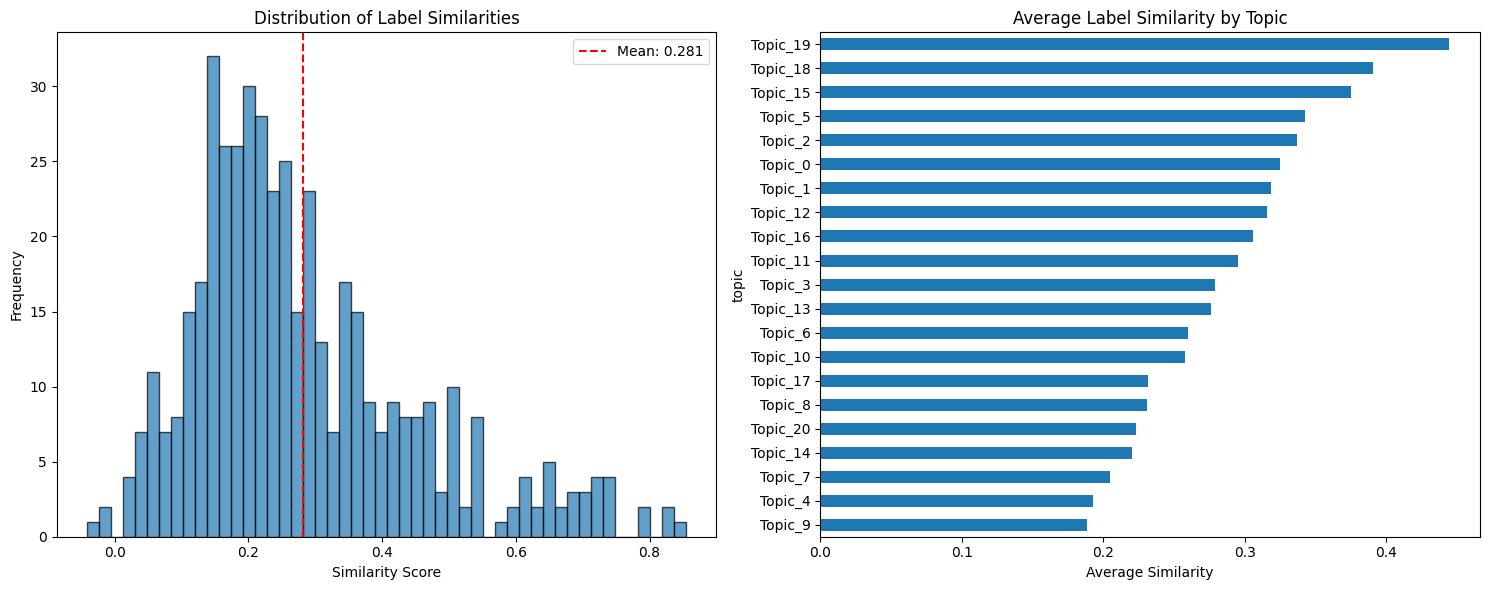


Analyzing extreme cases...
Labels with Perfect Agreement Across Annotators:


Topics with Strongest Disagreements:
          count  avg_similarity  min_similarity
topic                                          
Topic_7       9           0.041          -0.042
Topic_9       6           0.070           0.044
Topic_10      5           0.064           0.036
Topic_14      5           0.041          -0.015
Topic_17      5           0.061           0.019
Topic_4       4           0.058           0.034
Topic_8       3           0.068           0.052
Topic_13      2           0.074           0.048
Topic_6       1           0.029           0.029

Creating topic similarity matrices...


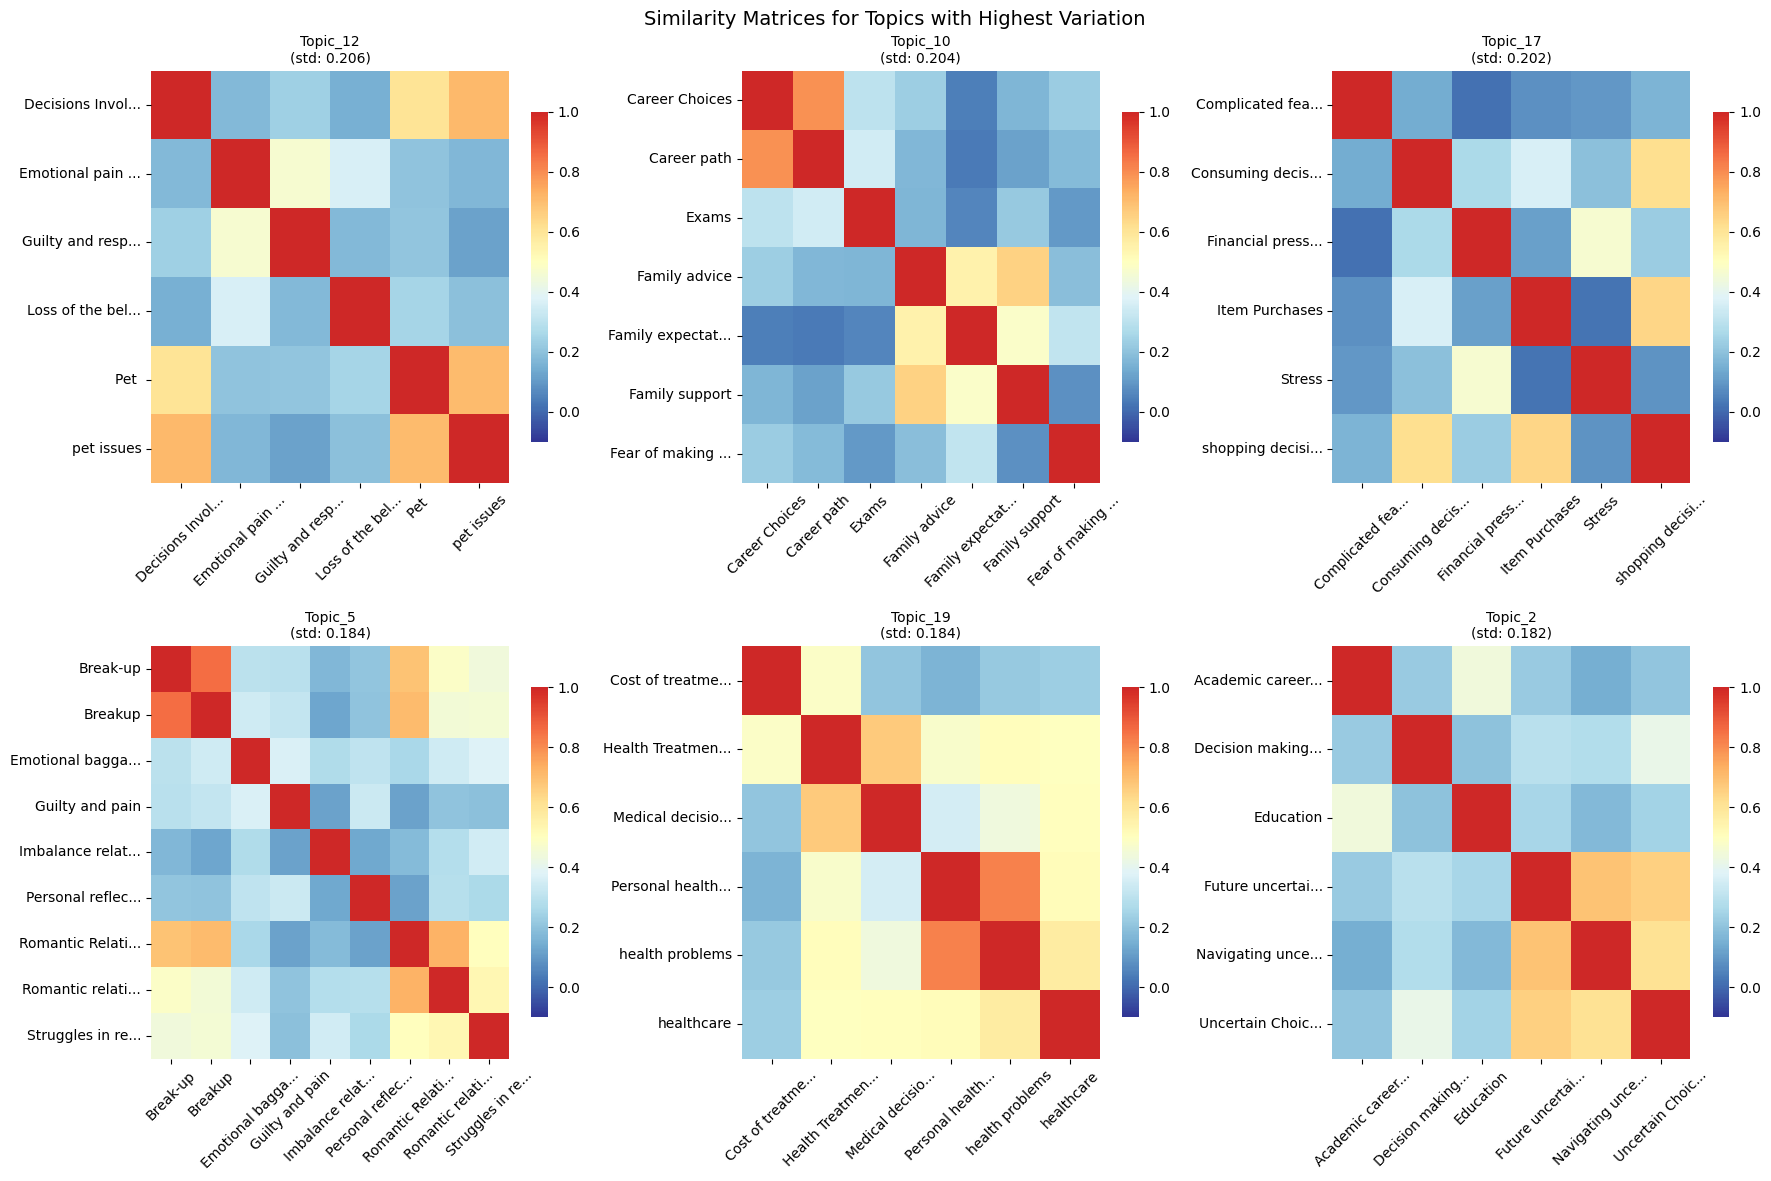


Analyzing annotator agreement patterns...


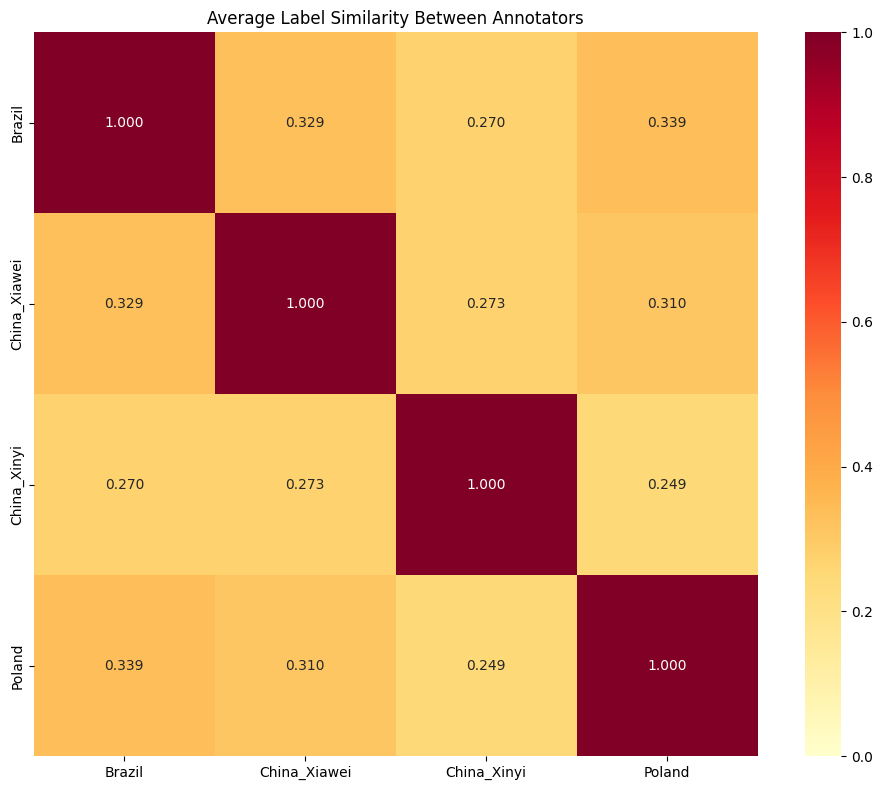


Most agreeable annotator pairs:
                           avg_similarity  std_similarity  count
annotator1   annotator2                                         
Brazil       Poland              0.338787        0.196093   32.0
             China_Xiawei        0.328845        0.181466   43.0
China_Xiawei Poland              0.309876        0.184195   74.0
             China_Xinyi         0.272638        0.154469  106.0
Brazil       China_Xinyi         0.269729        0.171282   45.0

Least agreeable annotator pairs:
                           avg_similarity  std_similarity  count
annotator1   annotator2                                         
China_Xinyi  Poland              0.248927        0.166086   80.0
Brazil       China_Xinyi         0.269729        0.171282   45.0
China_Xiawei China_Xinyi         0.272638        0.154469  106.0
             Poland              0.309876        0.184195   74.0
Brazil       China_Xiawei        0.328845        0.181466   43.0


In [67]:


# Since you already have similarity_df, let's work with that data

# Method 1: Visualize similarity distribution
def plot_similarity_distribution(similarity_df):
    """Plot distribution of similarity scores"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Overall distribution
    ax1.hist(similarity_df['similarity'], bins=50, edgecolor='black', alpha=0.7)
    ax1.axvline(similarity_df['similarity'].mean(), color='red', linestyle='--', 
                label=f'Mean: {similarity_df["similarity"].mean():.3f}')
    ax1.set_xlabel('Similarity Score')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution of Label Similarities')
    ax1.legend()
    
    # Distribution by topic
    topic_similarities = similarity_df.groupby('topic')['similarity'].mean().sort_values()
    topic_similarities.plot(kind='barh', ax=ax2)
    ax2.set_xlabel('Average Similarity')
    ax2.set_title('Average Label Similarity by Topic')
    
    plt.tight_layout()
    plt.show()


# Method 3: Analyze perfect matches and disagreements
def analyze_extreme_cases(similarity_df):
    """Analyze cases of perfect agreement and strong disagreement"""
    
    # Perfect matches (similarity = 1.0)
    perfect_matches = similarity_df[similarity_df['similarity'] == 1.0]
    
    # Group by label to see which labels are used by multiple annotators
    label_usage = defaultdict(list)
    
    for _, row in perfect_matches.iterrows():
        label = row['label1']  # Since label1 = label2 for perfect matches
        label_usage[label].append({
            'topic': row['topic'],
            'annotators': sorted([row['annotator1'], row['annotator2']])
        })
    
    print("Labels with Perfect Agreement Across Annotators:")
    print("="*80)
    
    for label, usages in sorted(label_usage.items(), 
                                key=lambda x: len(x[1]), reverse=True)[:10]:
        topics = set([u['topic'] for u in usages])
        print(f"\nLabel: '{label}'")
        print(f"Used in topics: {', '.join(sorted(topics))}")
        print(f"Number of perfect matches: {len(usages)}")
    
    # Analyze disagreements (low similarity)
    disagreements = similarity_df[similarity_df['similarity'] < 0.1]
    
    print("\n\nTopics with Strongest Disagreements:")
    print("="*80)
    
    disagreement_by_topic = disagreements.groupby('topic').agg({
        'similarity': ['count', 'mean', 'min']
    }).round(3)
    
    disagreement_by_topic.columns = ['count', 'avg_similarity', 'min_similarity']
    disagreement_by_topic = disagreement_by_topic.sort_values('count', ascending=False)
    
    print(disagreement_by_topic.head(10))
    
    return perfect_matches, disagreements

# Method 4: Create similarity matrix for each topic
def create_topic_similarity_matrices(similarity_df, topics_to_show=6):
    """Create similarity matrices for selected topics"""
    
    # Get topics with most variation in similarity
    topic_stats = similarity_df.groupby('topic')['similarity'].agg(['mean', 'std'])
    interesting_topics = topic_stats.sort_values('std', ascending=False).head(topics_to_show).index
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, topic in enumerate(interesting_topics):
        topic_data = similarity_df[similarity_df['topic'] == topic]
        
        # Get unique labels for this topic
        labels = sorted(set(topic_data['label1'].unique()) | set(topic_data['label2'].unique()))
        
        # Create similarity matrix
        sim_matrix = pd.DataFrame(0.0, index=labels, columns=labels)
        
        # Fill diagonal with 1s
        for label in labels:
            sim_matrix.loc[label, label] = 1.0
        
        # Fill with similarity values
        for _, row in topic_data.iterrows():
            sim_matrix.loc[row['label1'], row['label2']] = row['similarity']
            sim_matrix.loc[row['label2'], row['label1']] = row['similarity']
        
        # Truncate labels for display
        display_labels = [l[:15] + '...' if len(l) > 15 else l for l in labels]
        
        # Plot heatmap
        sns.heatmap(sim_matrix, 
                   xticklabels=display_labels,
                   yticklabels=display_labels,
                   cmap='RdYlBu_r',
                   center=0.5,
                   vmin=-0.1, vmax=1,
                   ax=axes[idx],
                   cbar_kws={'shrink': 0.8})
        
        axes[idx].set_title(f'{topic}\n(std: {topic_stats.loc[topic, "std"]:.3f})', 
                           fontsize=10)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].tick_params(axis='y', rotation=0)
    
    plt.suptitle('Similarity Matrices for Topics with Highest Variation', fontsize=14)
    plt.tight_layout()
    plt.show()

# Method 5: Annotator agreement analysis
def analyze_annotator_patterns(similarity_df):
    """Analyze patterns in annotator agreement"""
    
    # Calculate average similarity between each pair of annotators
    annotator_pairs = defaultdict(list)
    
    for _, row in similarity_df.iterrows():
        if row['annotator1'] != row['annotator2']:
            pair = tuple(sorted([row['annotator1'], row['annotator2']]))
            annotator_pairs[pair].append(row['similarity'])
    
    # Calculate average similarity for each pair
    pair_similarities = {}
    for pair, sims in annotator_pairs.items():
        pair_similarities[pair] = {
            'avg_similarity': np.mean(sims),
            'std_similarity': np.std(sims),
            'count': len(sims)
        }
    
    # Convert to dataframe for easier analysis
    pair_df = pd.DataFrame(pair_similarities).T
    pair_df.index = pd.MultiIndex.from_tuples(pair_df.index, names=['annotator1', 'annotator2'])
    
    # Create heatmap of average similarities
    annotators = sorted(set(similarity_df['annotator1'].unique()) | 
                       set(similarity_df['annotator2'].unique()))
    
    sim_matrix = pd.DataFrame(1.0, index=annotators, columns=annotators)
    
    for (ann1, ann2), row in pair_df.iterrows():
        sim_matrix.loc[ann1, ann2] = row['avg_similarity']
        sim_matrix.loc[ann2, ann1] = row['avg_similarity']
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
                vmin=0, vmax=1, square=True)
    plt.title('Average Label Similarity Between Annotators')
    plt.tight_layout()
    plt.show()
    
    return pair_df

# Run the analyses
print("Analyzing your similarity data...")

# 1. Plot similarity distribution
plot_similarity_distribution(similarity_df)


# 3. Analyze extreme cases
print("\nAnalyzing extreme cases...")
perfect_matches, disagreements = analyze_extreme_cases(similarity_df)

# 4. Create similarity matrices for interesting topics
print("\nCreating topic similarity matrices...")
create_topic_similarity_matrices(similarity_df)

# 5. Analyze annotator patterns
print("\nAnalyzing annotator agreement patterns...")
pair_df = analyze_annotator_patterns(similarity_df)
print("\nMost agreeable annotator pairs:")
print(pair_df.sort_values('avg_similarity', ascending=False).head())
print("\nLeast agreeable annotator pairs:")
print(pair_df.sort_values('avg_similarity', ascending=True).head())

Creating network visualizations for each topic...


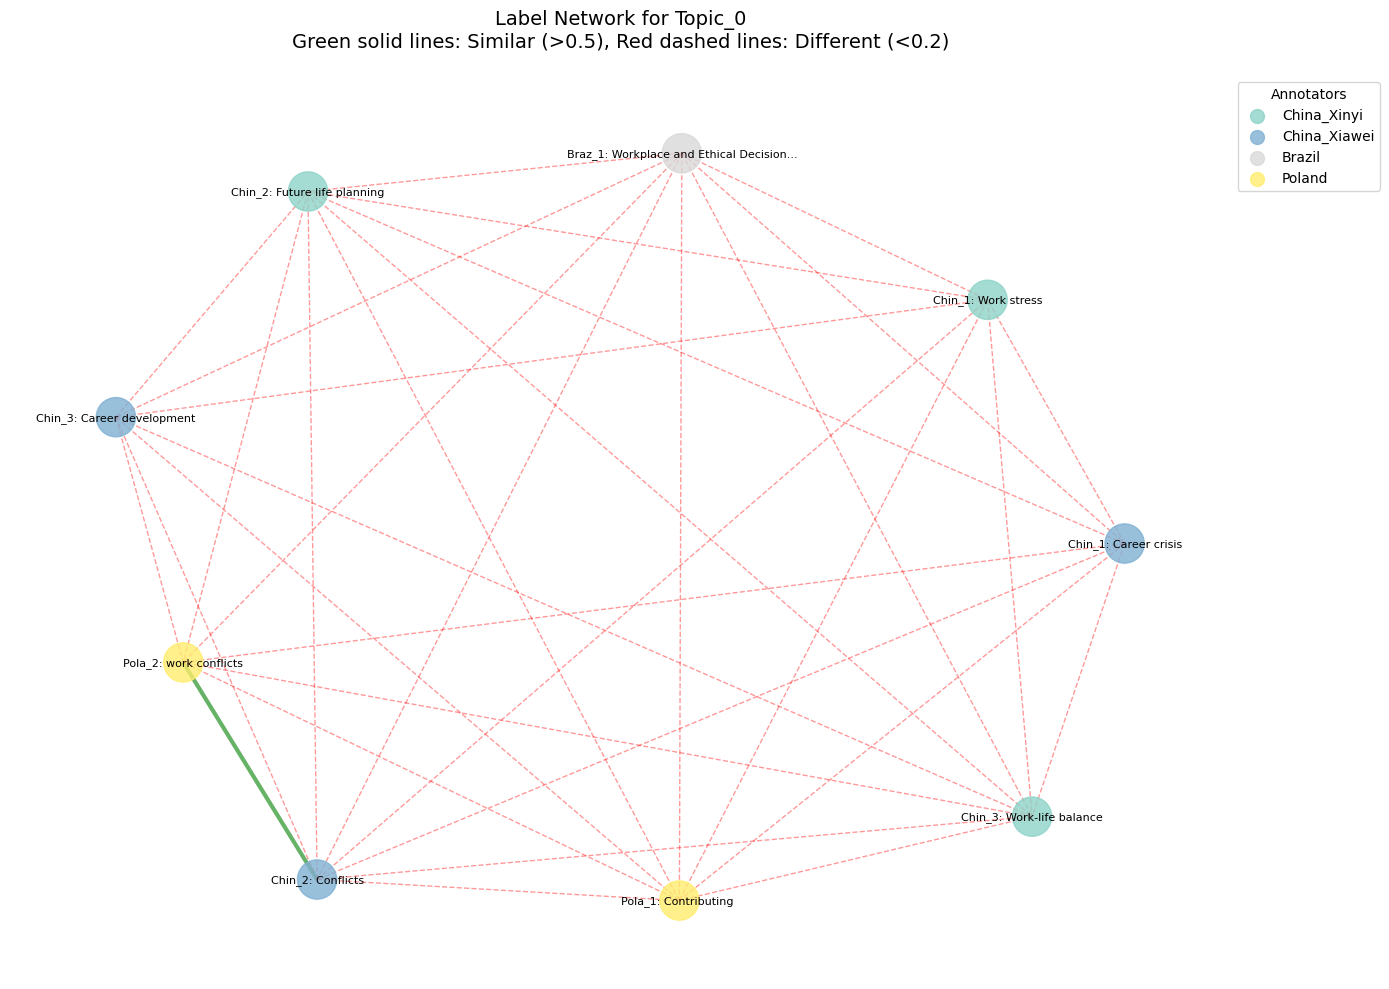


Topic_0 Statistics:
  Total labels: 9
  Similar pairs: 1
  Different pairs: 33

  Most similar labels:
    - 'Conflicts...' vs 'work conflicts...'
      (China_Xiawei vs Poland, similarity: 0.563)

  Most different labels:
    - 'Workplace and Ethical Decisions...' vs 'Career crisis...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Workplace and Ethical Decisions...' vs 'Conflicts...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Workplace and Ethical Decisions...' vs 'Career development...'
      (Brazil vs China_Xiawei, similarity: 0.000)


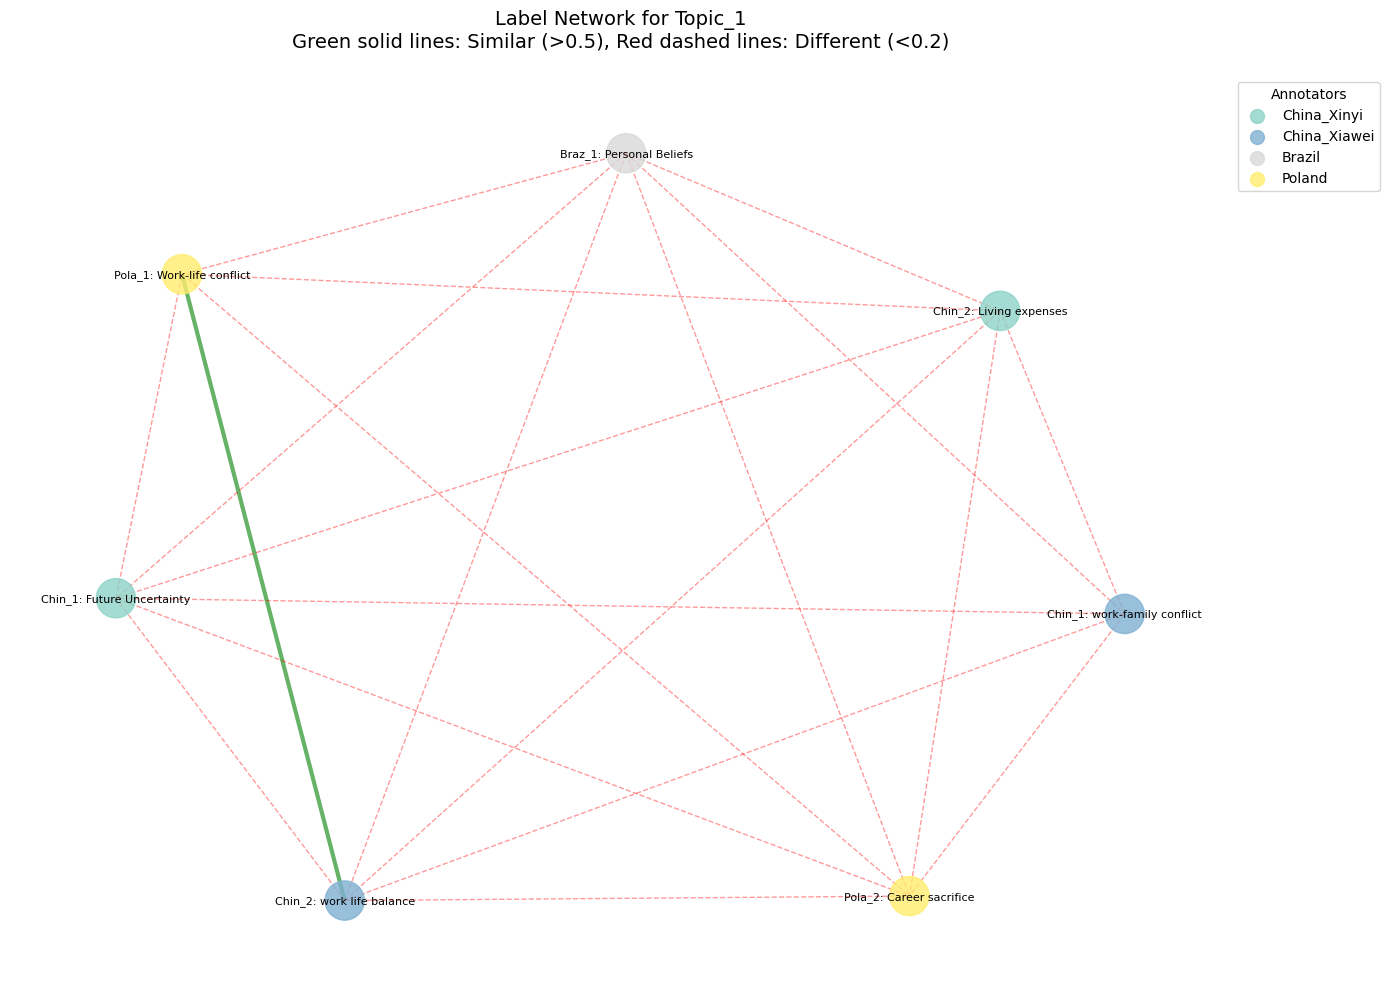


Topic_1 Statistics:
  Total labels: 7
  Similar pairs: 1
  Different pairs: 19

  Most similar labels:
    - 'work life balance...' vs 'Work-life conflict...'
      (China_Xiawei vs Poland, similarity: 0.505)

  Most different labels:
    - 'Personal Beliefs...' vs 'work-family conflict...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Personal Beliefs...' vs 'work life balance...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Personal Beliefs...' vs 'Future Uncertainty...'
      (Brazil vs China_Xinyi, similarity: 0.000)


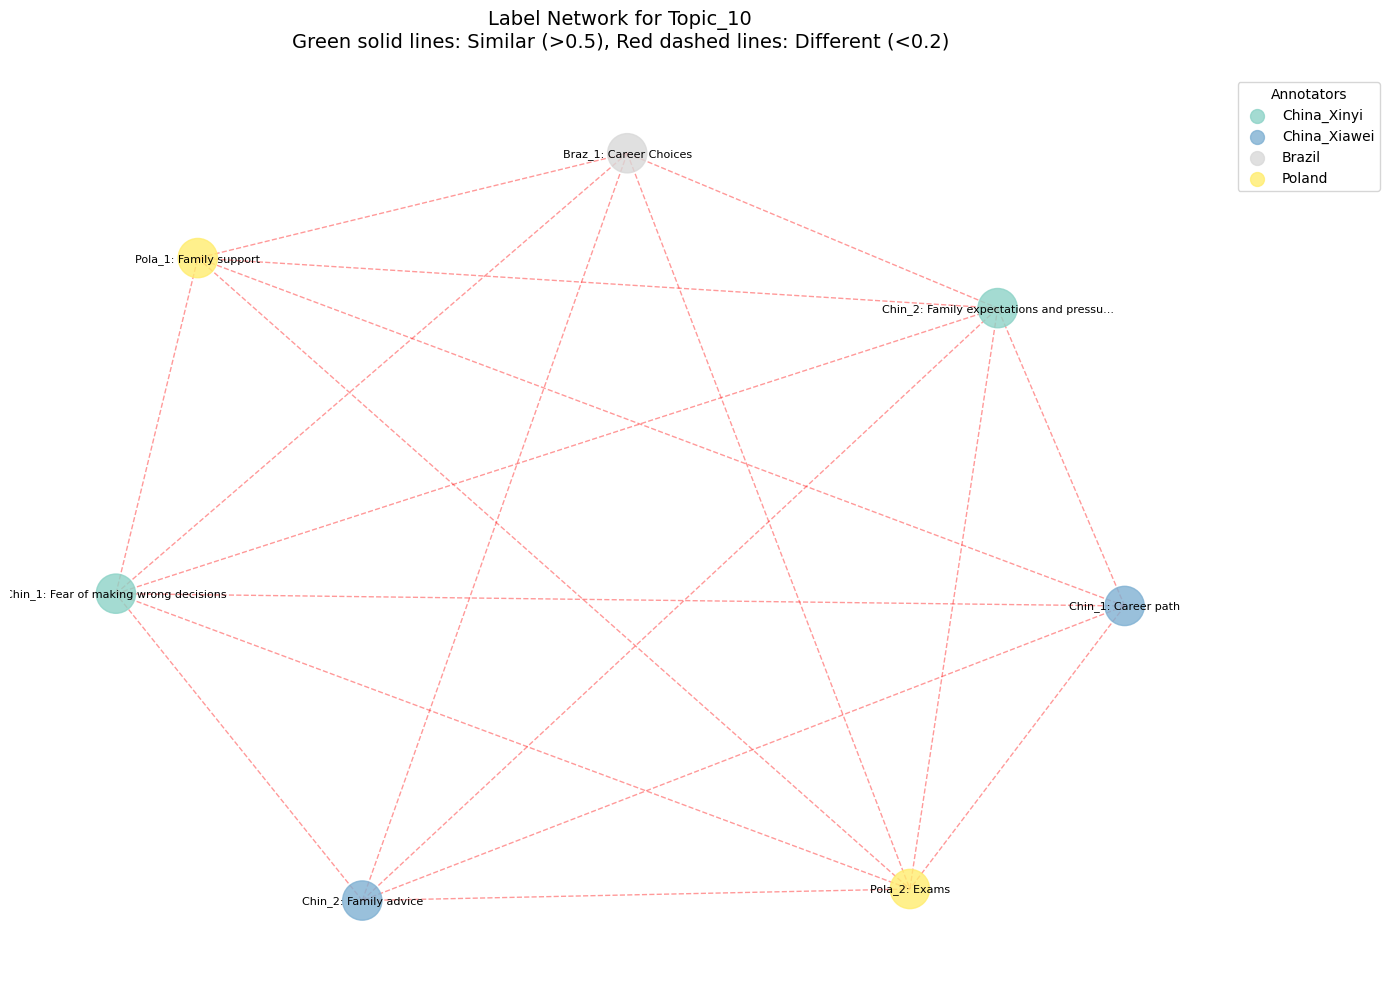


Topic_10 Statistics:
  Total labels: 7
  Similar pairs: 0
  Different pairs: 19

  Most similar labels:

  Most different labels:
    - 'Career Choices...' vs 'Family advice...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Career Choices...' vs 'Fear of making wrong decisions...'
      (Brazil vs China_Xinyi, similarity: 0.000)
    - 'Career Choices...' vs 'Family expectations and pressure...'
      (Brazil vs China_Xinyi, similarity: 0.000)


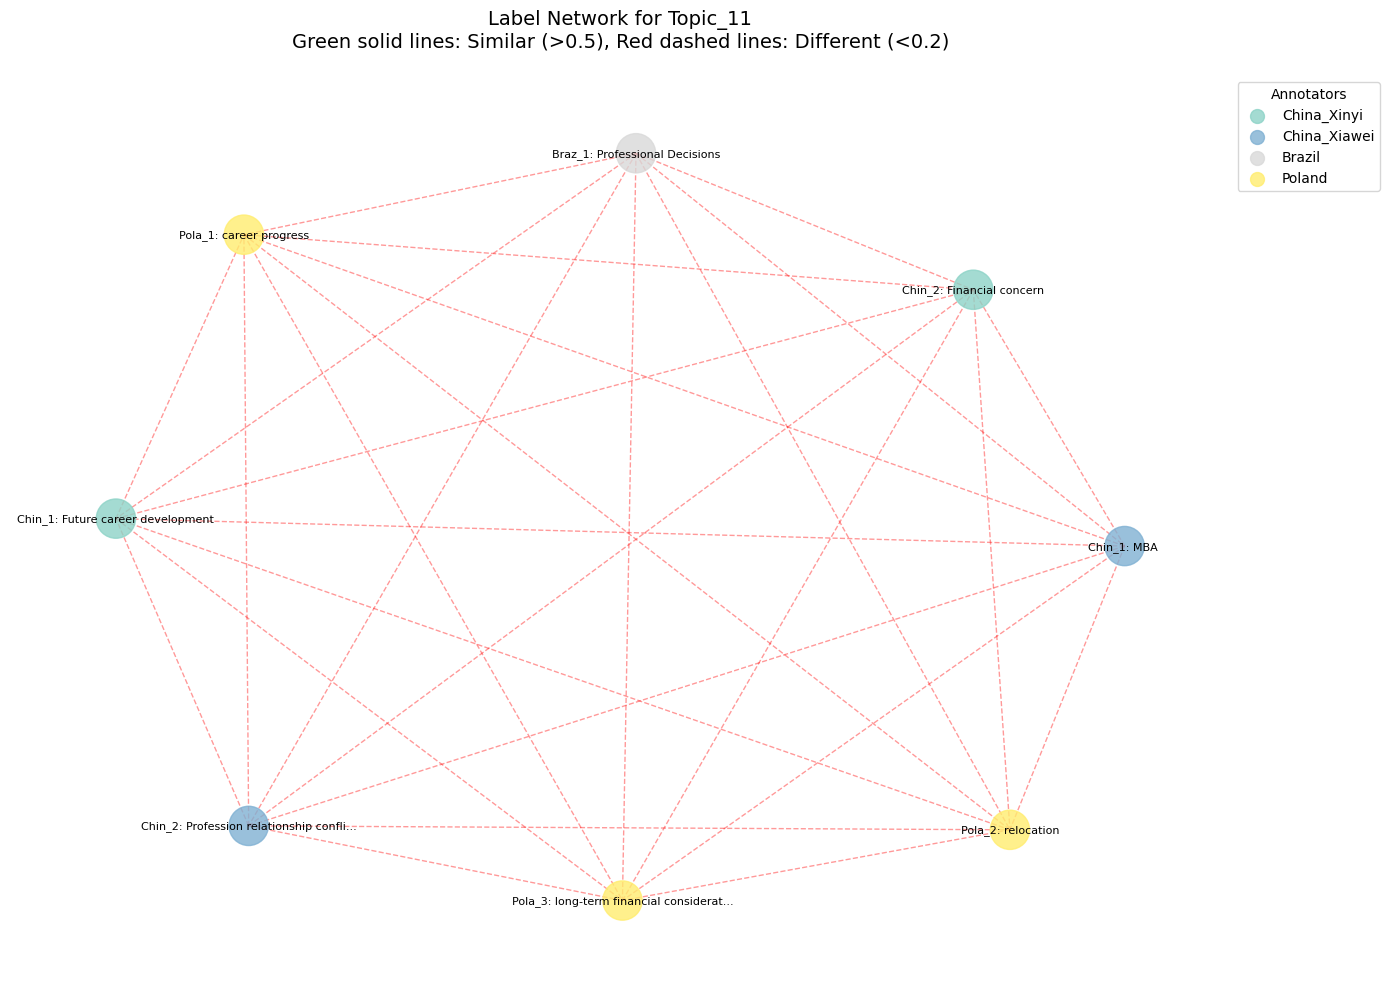


Topic_11 Statistics:
  Total labels: 8
  Similar pairs: 0
  Different pairs: 28

  Most similar labels:

  Most different labels:
    - 'Professional Decisions...' vs 'MBA ...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Professional Decisions...' vs 'Profession relationship conflicts...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Professional Decisions...' vs 'Future career development...'
      (Brazil vs China_Xinyi, similarity: 0.000)


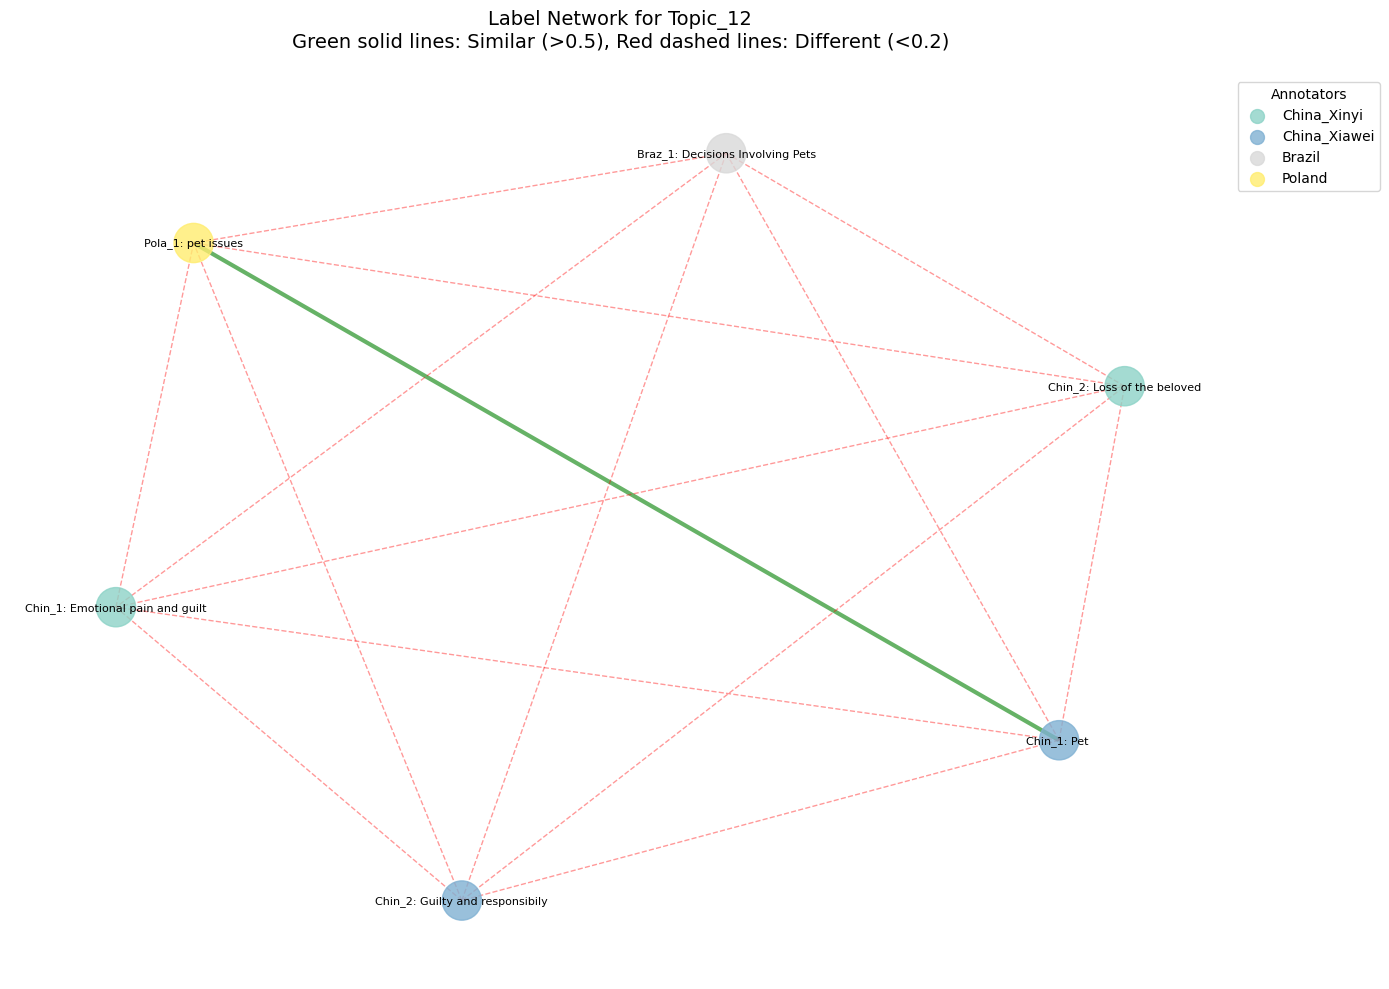


Topic_12 Statistics:
  Total labels: 6
  Similar pairs: 1
  Different pairs: 14

  Most similar labels:
    - 'Pet ...' vs 'pet issues...'
      (China_Xiawei vs Poland, similarity: 0.502)

  Most different labels:
    - 'Decisions Involving Pets...' vs 'Pet ...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Decisions Involving Pets...' vs 'Guilty and responsibily...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Decisions Involving Pets...' vs 'Emotional pain and guilt...'
      (Brazil vs China_Xinyi, similarity: 0.000)


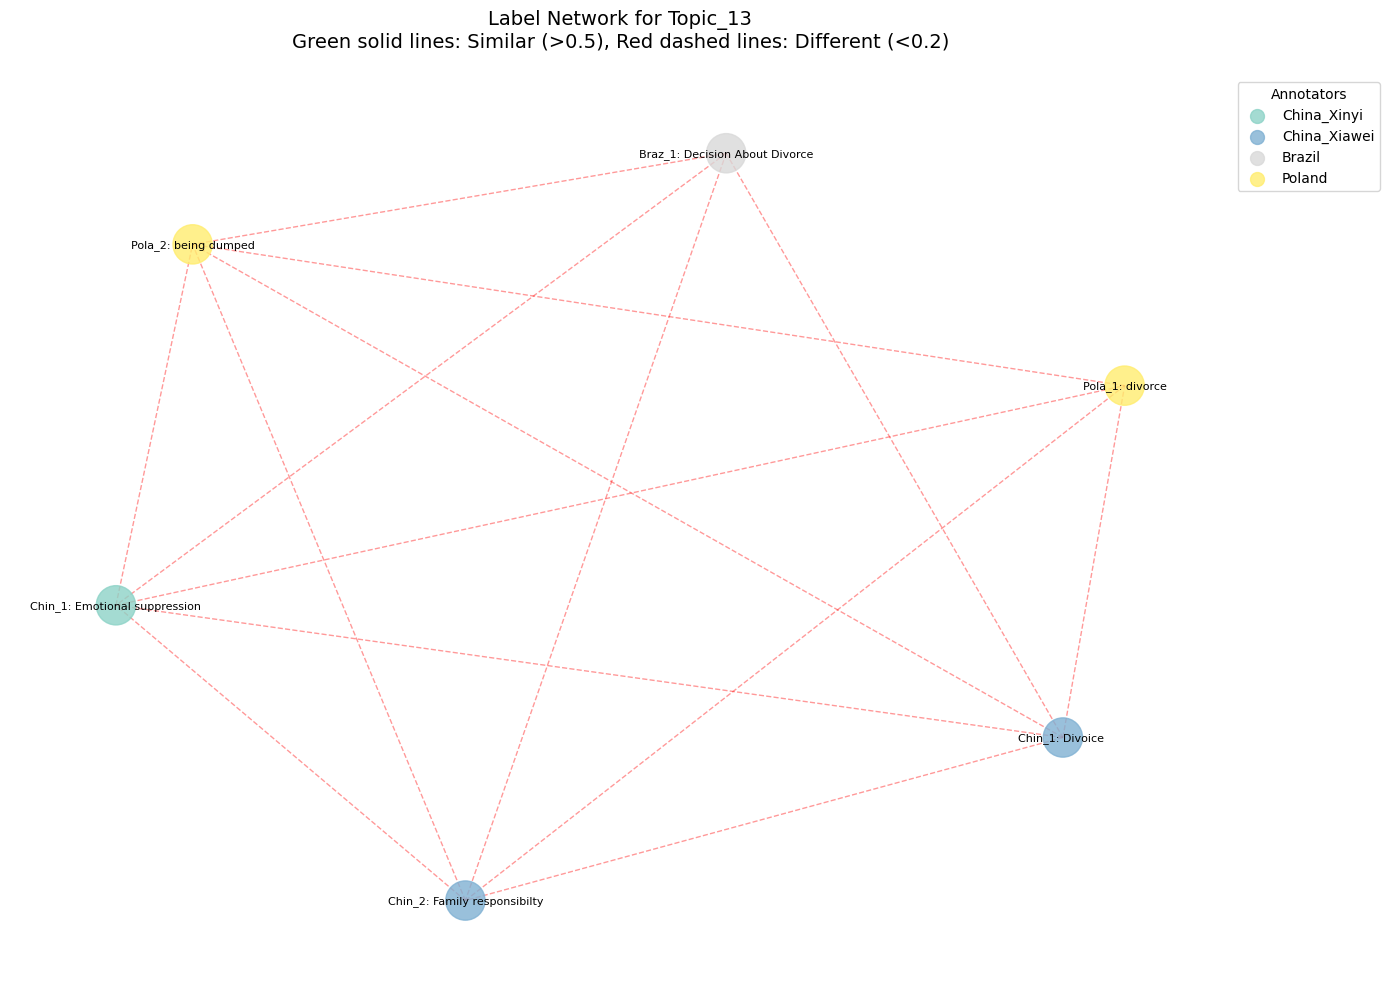


Topic_13 Statistics:
  Total labels: 6
  Similar pairs: 0
  Different pairs: 14

  Most similar labels:

  Most different labels:
    - 'Decision About Divorce...' vs 'Divoice ...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Decision About Divorce...' vs 'Family responsibilty...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Decision About Divorce...' vs 'Emotional suppression...'
      (Brazil vs China_Xinyi, similarity: 0.000)


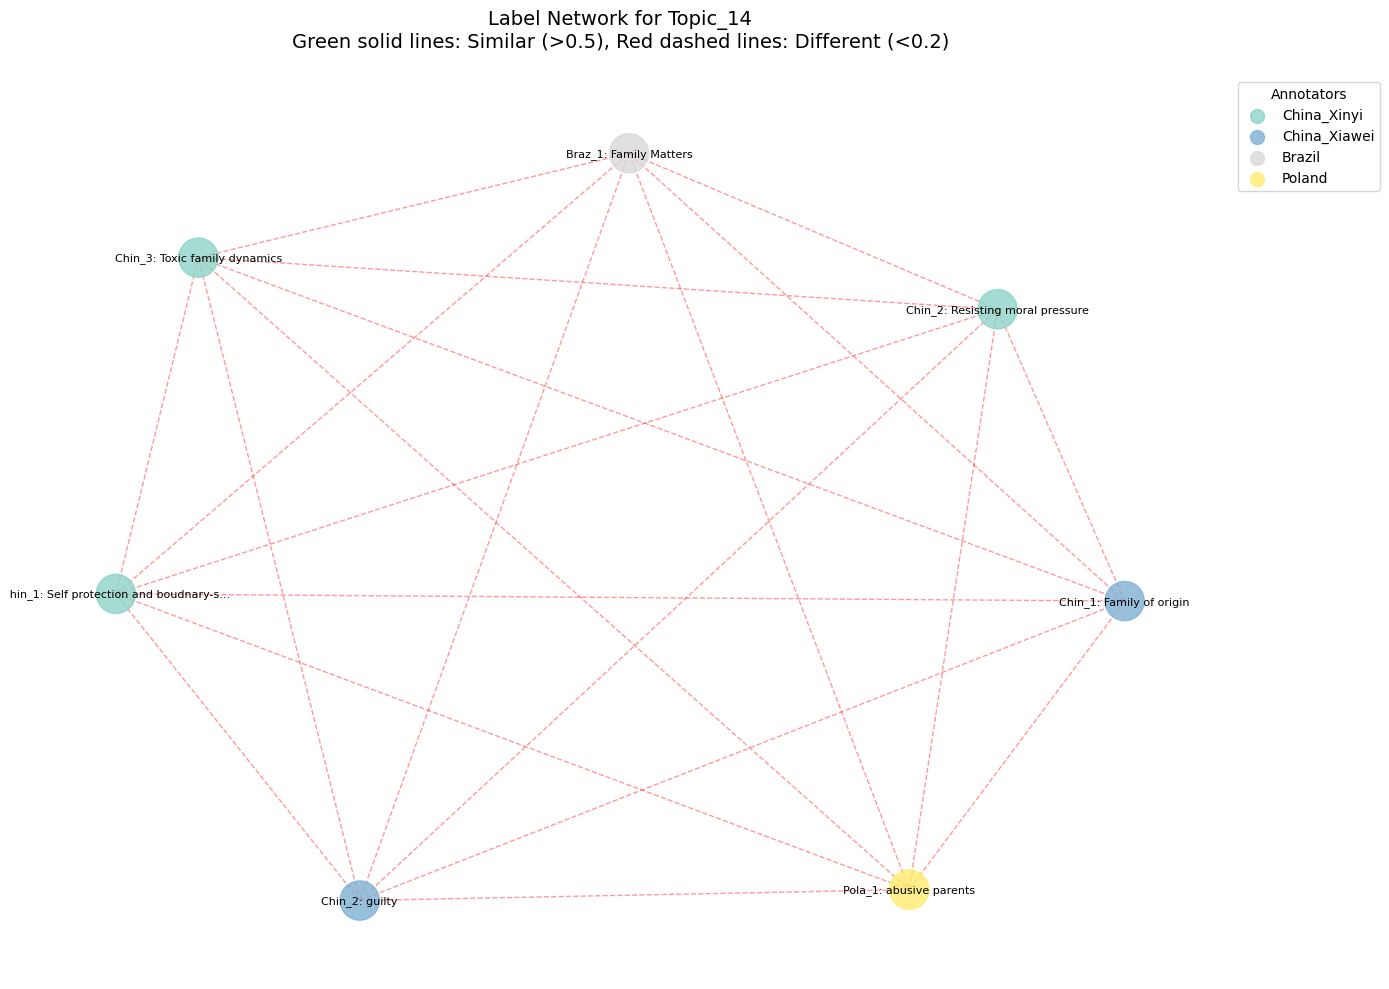


Topic_14 Statistics:
  Total labels: 7
  Similar pairs: 0
  Different pairs: 21

  Most similar labels:

  Most different labels:
    - 'Family Matters...' vs 'guilty...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Family Matters...' vs 'Self protection and boudnary-setting...'
      (Brazil vs China_Xinyi, similarity: 0.000)
    - 'Family Matters...' vs 'Resisting moral pressure...'
      (Brazil vs China_Xinyi, similarity: 0.000)


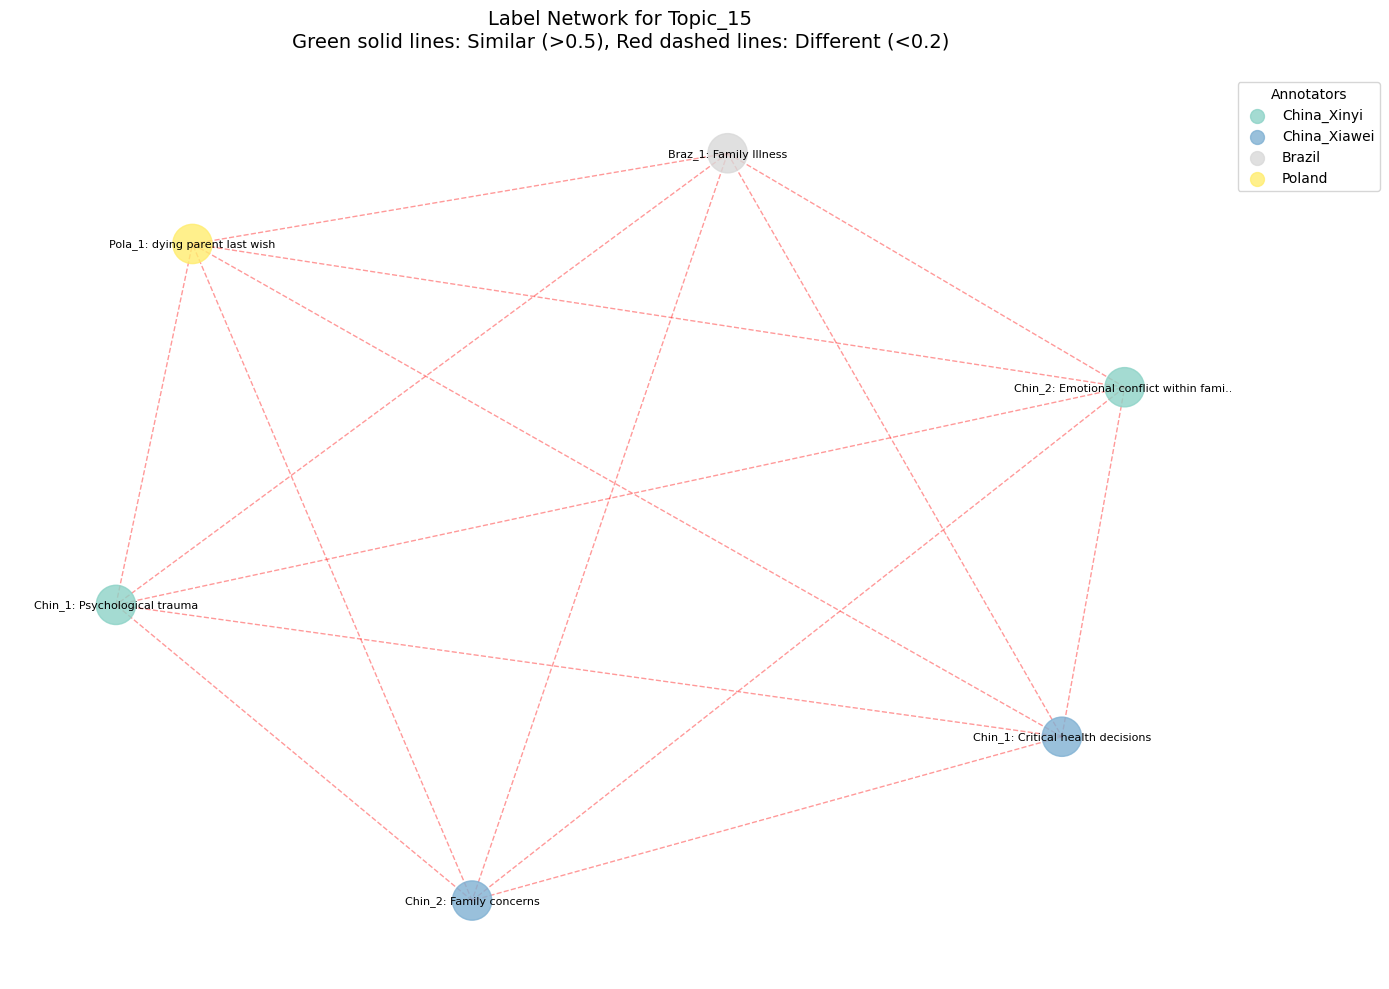


Topic_15 Statistics:
  Total labels: 6
  Similar pairs: 0
  Different pairs: 15

  Most similar labels:

  Most different labels:
    - 'Family Illness...' vs 'Critical health decisions...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Family Illness...' vs 'Psychological trauma...'
      (Brazil vs China_Xinyi, similarity: 0.000)
    - 'Family Illness...' vs 'dying parent last wish...'
      (Brazil vs Poland, similarity: 0.000)


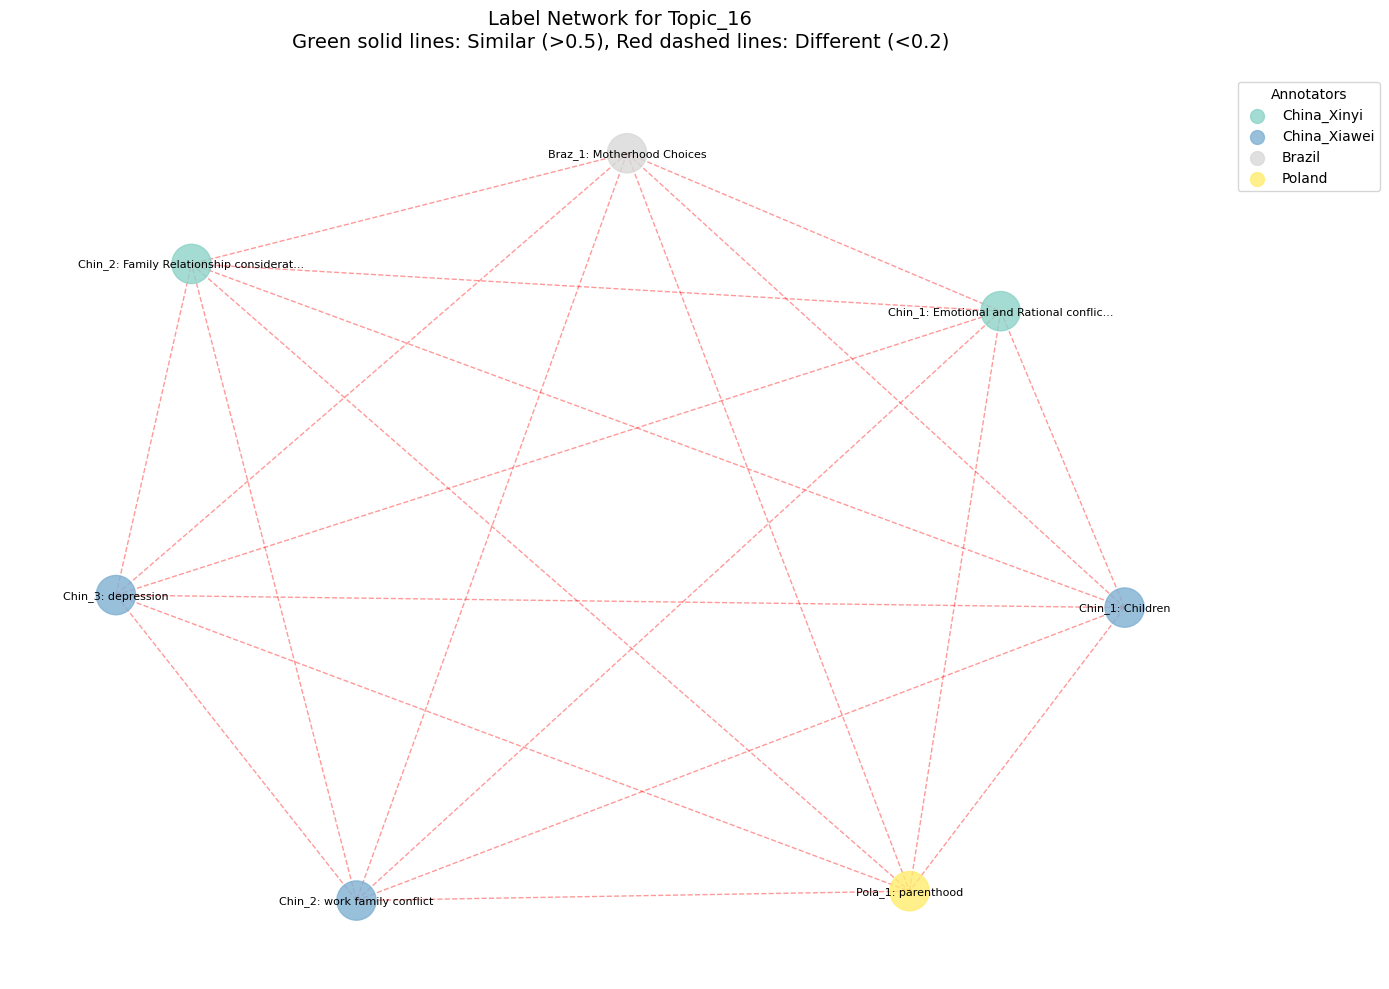


Topic_16 Statistics:
  Total labels: 7
  Similar pairs: 0
  Different pairs: 21

  Most similar labels:

  Most different labels:
    - 'Motherhood Choices...' vs 'Children...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Motherhood Choices...' vs 'work family conflict...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Motherhood Choices...' vs 'depression...'
      (Brazil vs China_Xiawei, similarity: 0.000)


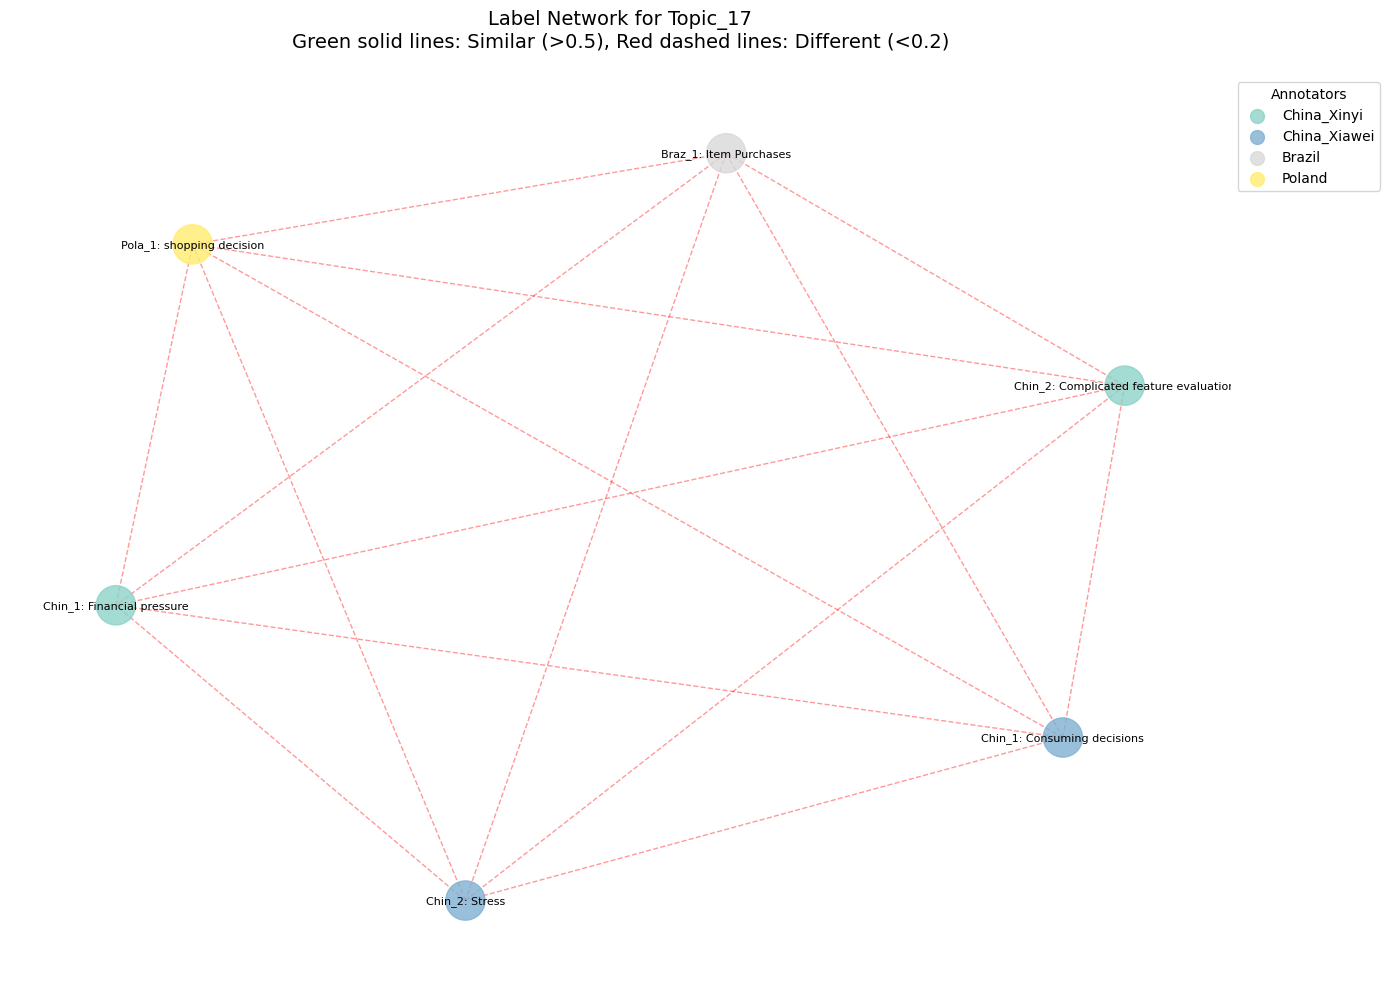


Topic_17 Statistics:
  Total labels: 6
  Similar pairs: 0
  Different pairs: 15

  Most similar labels:

  Most different labels:
    - 'Item Purchases...' vs 'Consuming decisions...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Item Purchases...' vs 'Stress...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Item Purchases...' vs 'Financial pressure...'
      (Brazil vs China_Xinyi, similarity: 0.000)


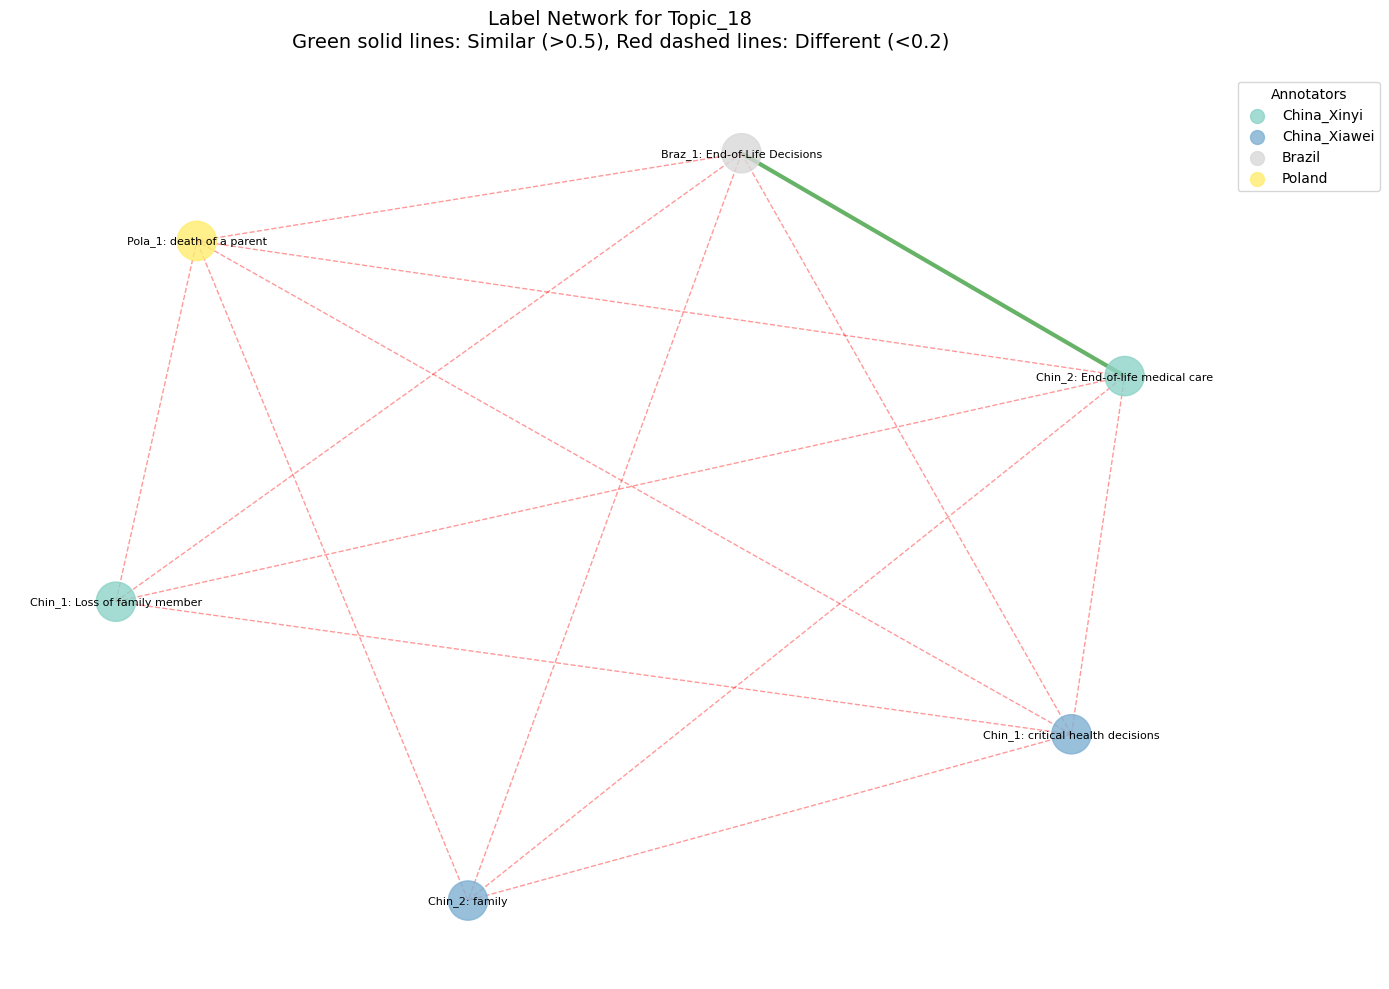


Topic_18 Statistics:
  Total labels: 6
  Similar pairs: 1
  Different pairs: 13

  Most similar labels:
    - 'End-of-Life Decisions...' vs 'End-of-life medical care...'
      (Brazil vs China_Xinyi, similarity: 0.528)

  Most different labels:
    - 'End-of-Life Decisions...' vs 'family...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'critical health decisions...' vs 'family...'
      (China_Xiawei vs China_Xiawei, similarity: 0.000)
    - 'critical health decisions...' vs 'Loss of family member...'
      (China_Xiawei vs China_Xinyi, similarity: 0.000)


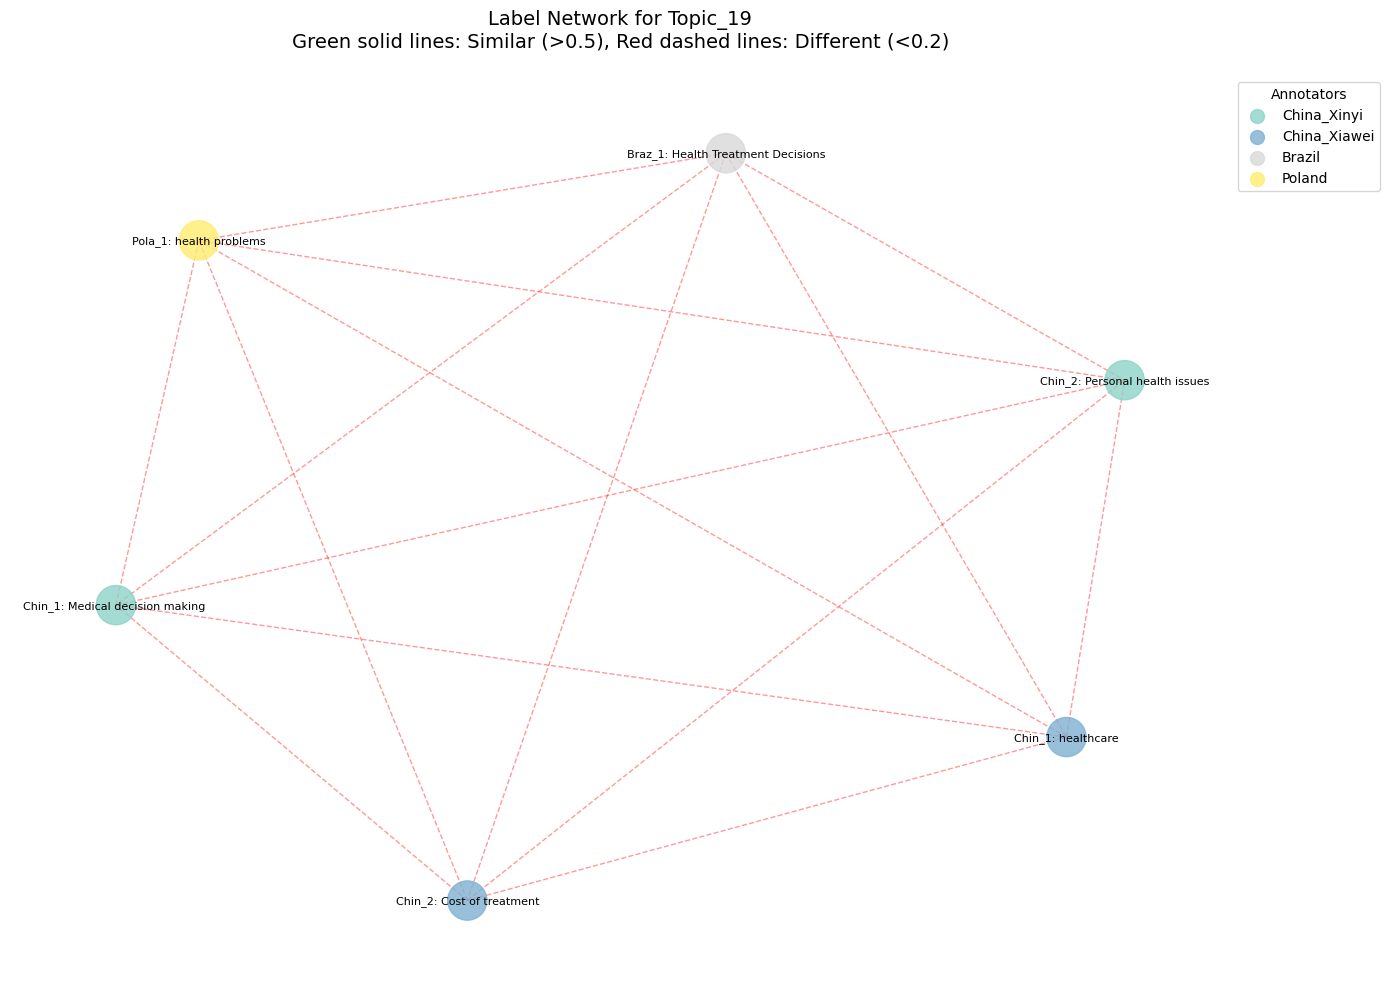


Topic_19 Statistics:
  Total labels: 6
  Similar pairs: 0
  Different pairs: 15

  Most similar labels:

  Most different labels:
    - 'Health Treatment Decisions...' vs 'healthcare...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Health Treatment Decisions...' vs 'Medical decision making ...'
      (Brazil vs China_Xinyi, similarity: 0.000)
    - 'healthcare...' vs 'Cost of treatment...'
      (China_Xiawei vs China_Xiawei, similarity: 0.000)


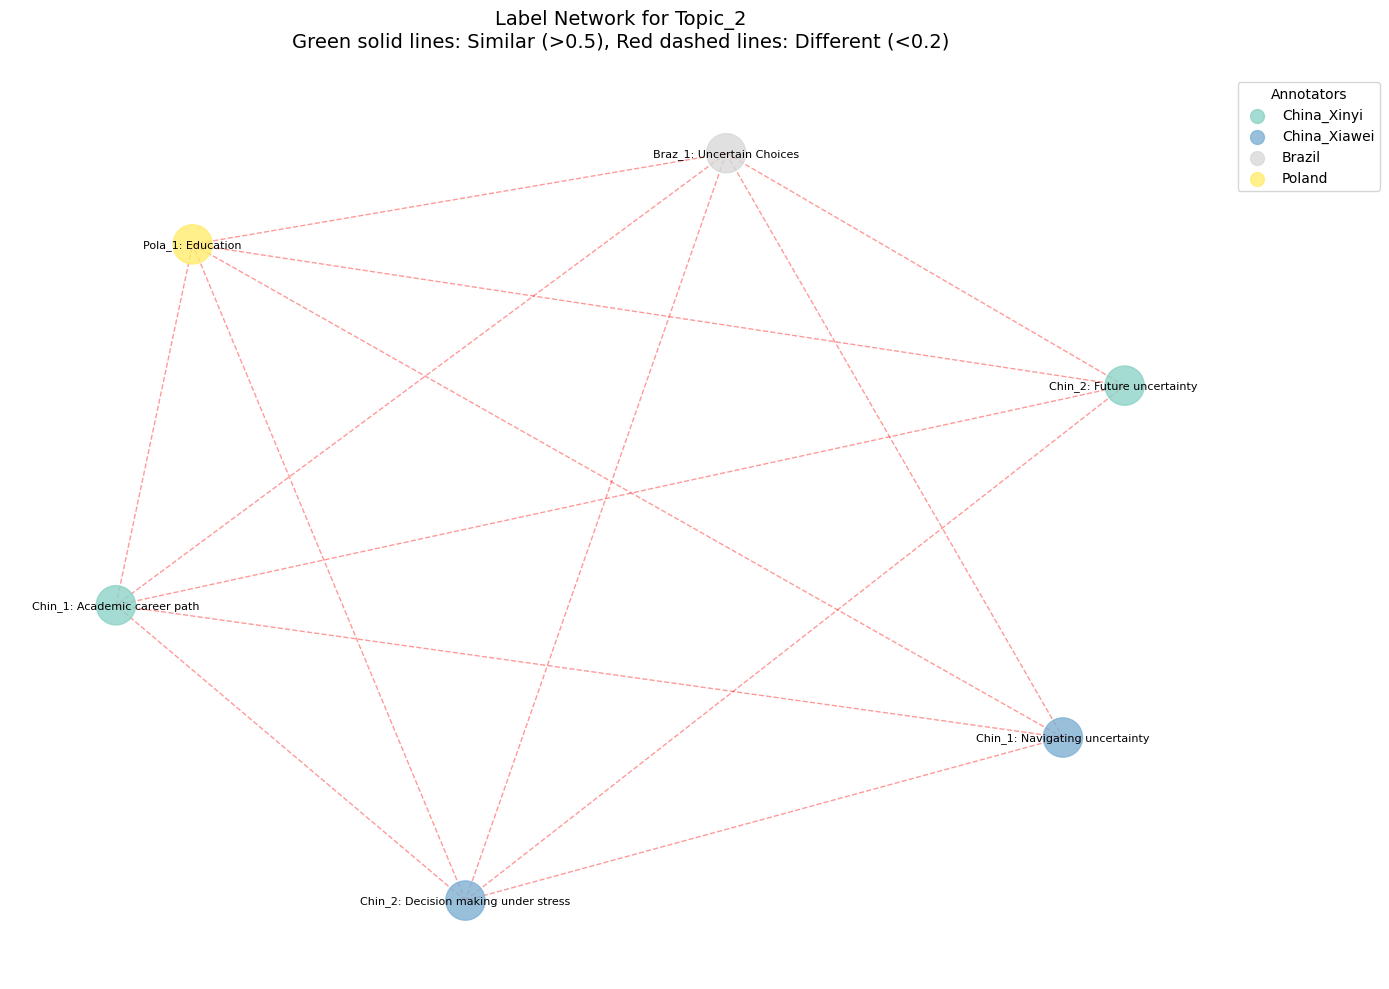


Topic_2 Statistics:
  Total labels: 6
  Similar pairs: 0
  Different pairs: 14

  Most similar labels:

  Most different labels:
    - 'Uncertain Choices...' vs 'Navigating uncertainty...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Uncertain Choices...' vs 'Decision making under stress...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Uncertain Choices...' vs 'Academic career path...'
      (Brazil vs China_Xinyi, similarity: 0.000)


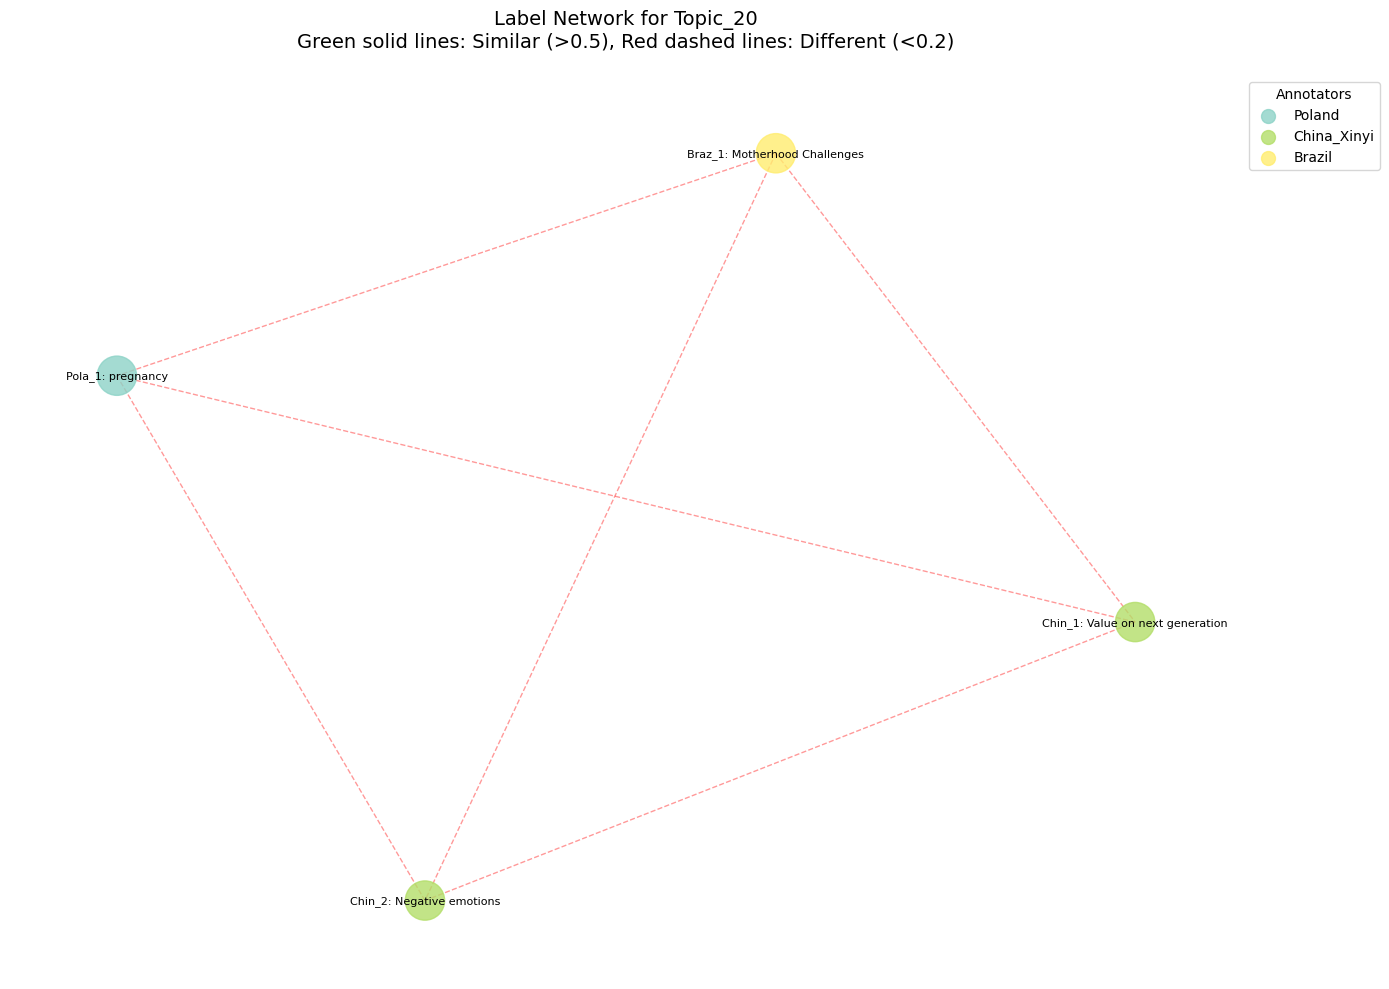


Topic_20 Statistics:
  Total labels: 4
  Similar pairs: 0
  Different pairs: 6

  Most similar labels:

  Most different labels:
    - 'Motherhood Challenges...' vs 'Value on next generation...'
      (Brazil vs China_Xinyi, similarity: 0.000)
    - 'Motherhood Challenges...' vs 'Negative emotions...'
      (Brazil vs China_Xinyi, similarity: 0.000)
    - 'Motherhood Challenges...' vs 'pregnancy...'
      (Brazil vs Poland, similarity: 0.000)


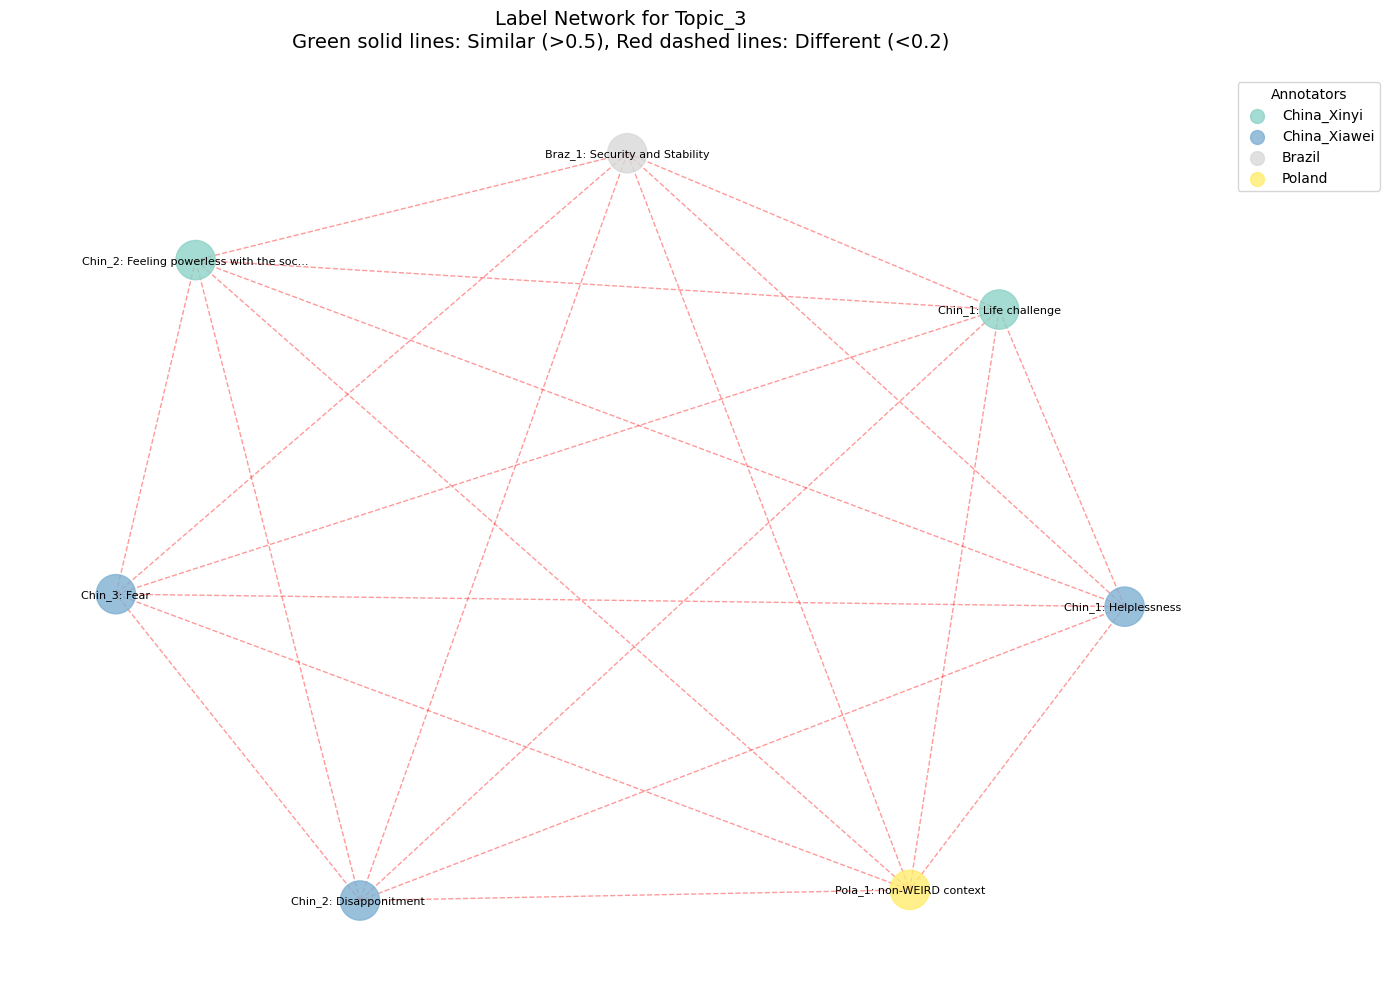


Topic_3 Statistics:
  Total labels: 7
  Similar pairs: 0
  Different pairs: 21

  Most similar labels:

  Most different labels:
    - 'Security and Stability...' vs 'Helplessness ...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Security and Stability...' vs 'Disapponitment ...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Security and Stability...' vs 'Fear...'
      (Brazil vs China_Xiawei, similarity: 0.000)


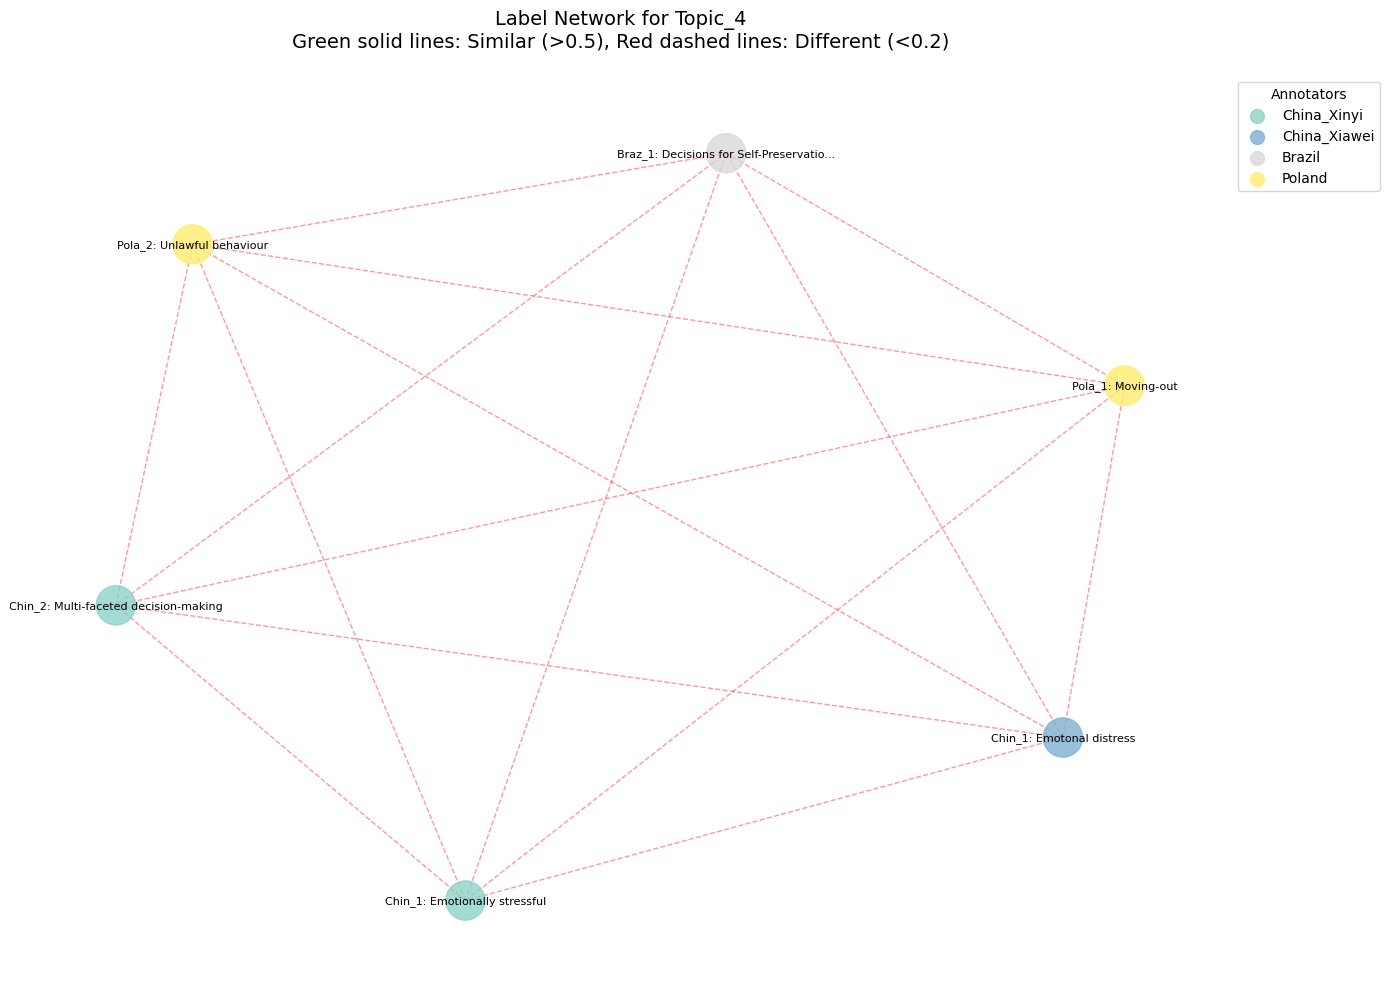


Topic_4 Statistics:
  Total labels: 6
  Similar pairs: 0
  Different pairs: 15

  Most similar labels:

  Most different labels:
    - 'Decisions for Self-Preservation...' vs 'Emotonal distress...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Decisions for Self-Preservation...' vs 'Emotionally stressful...'
      (Brazil vs China_Xinyi, similarity: 0.000)
    - 'Decisions for Self-Preservation...' vs 'Multi-faceted decision-making...'
      (Brazil vs China_Xinyi, similarity: 0.000)


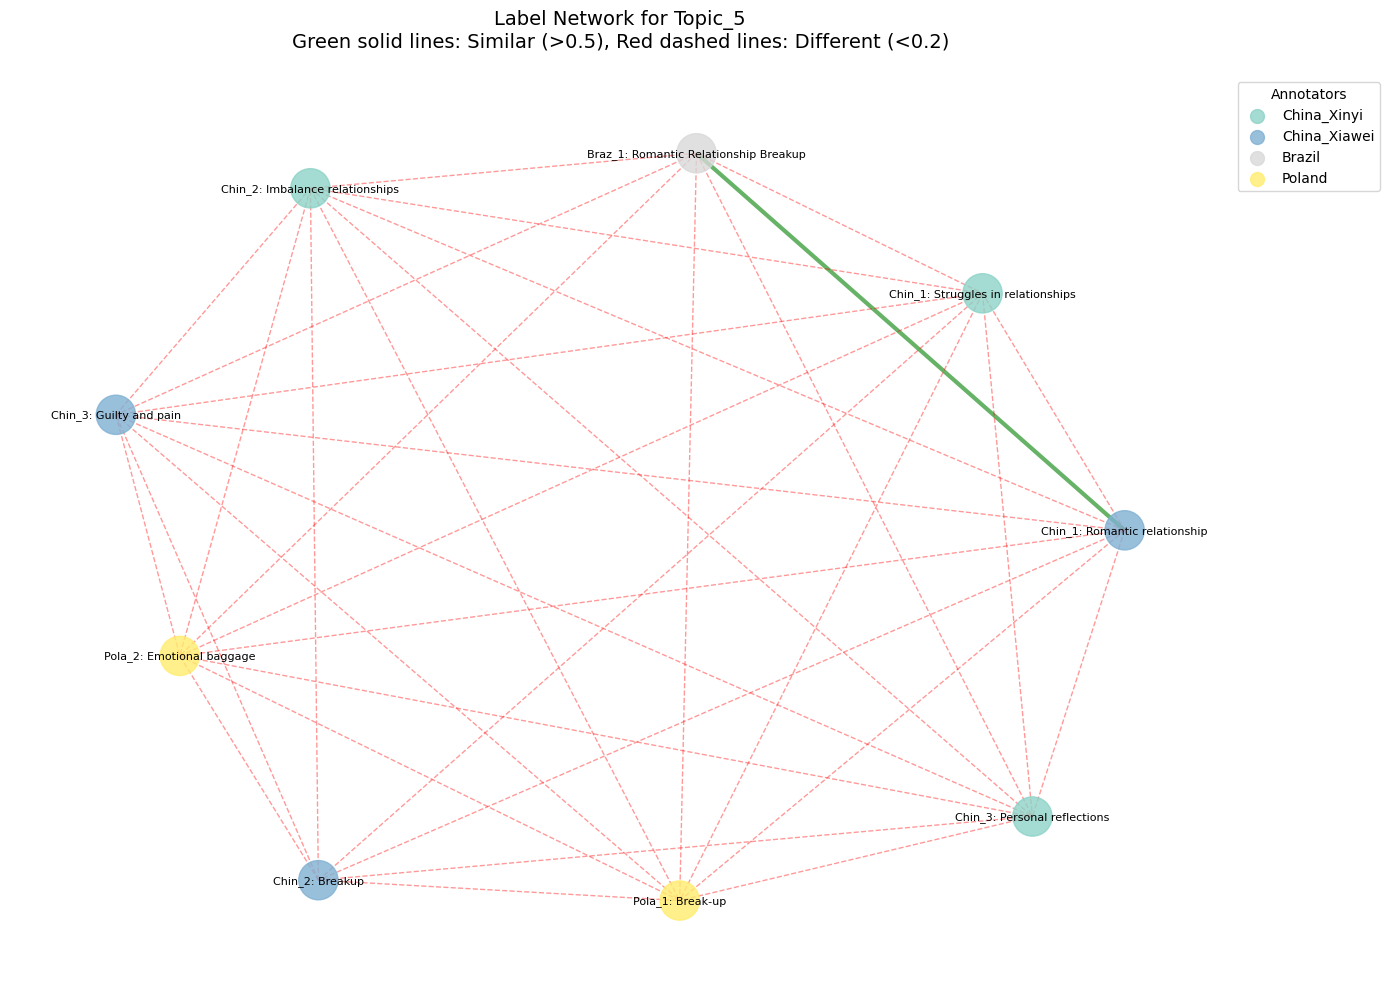


Topic_5 Statistics:
  Total labels: 9
  Similar pairs: 1
  Different pairs: 34

  Most similar labels:
    - 'Romantic Relationship Breakup...' vs 'Romantic relationship...'
      (Brazil vs China_Xiawei, similarity: 0.745)

  Most different labels:
    - 'Romantic Relationship Breakup...' vs 'Guilty and pain...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Romantic Relationship Breakup...' vs 'Struggles in relationships...'
      (Brazil vs China_Xinyi, similarity: 0.000)
    - 'Romantic Relationship Breakup...' vs 'Imbalance relationships...'
      (Brazil vs China_Xinyi, similarity: 0.000)


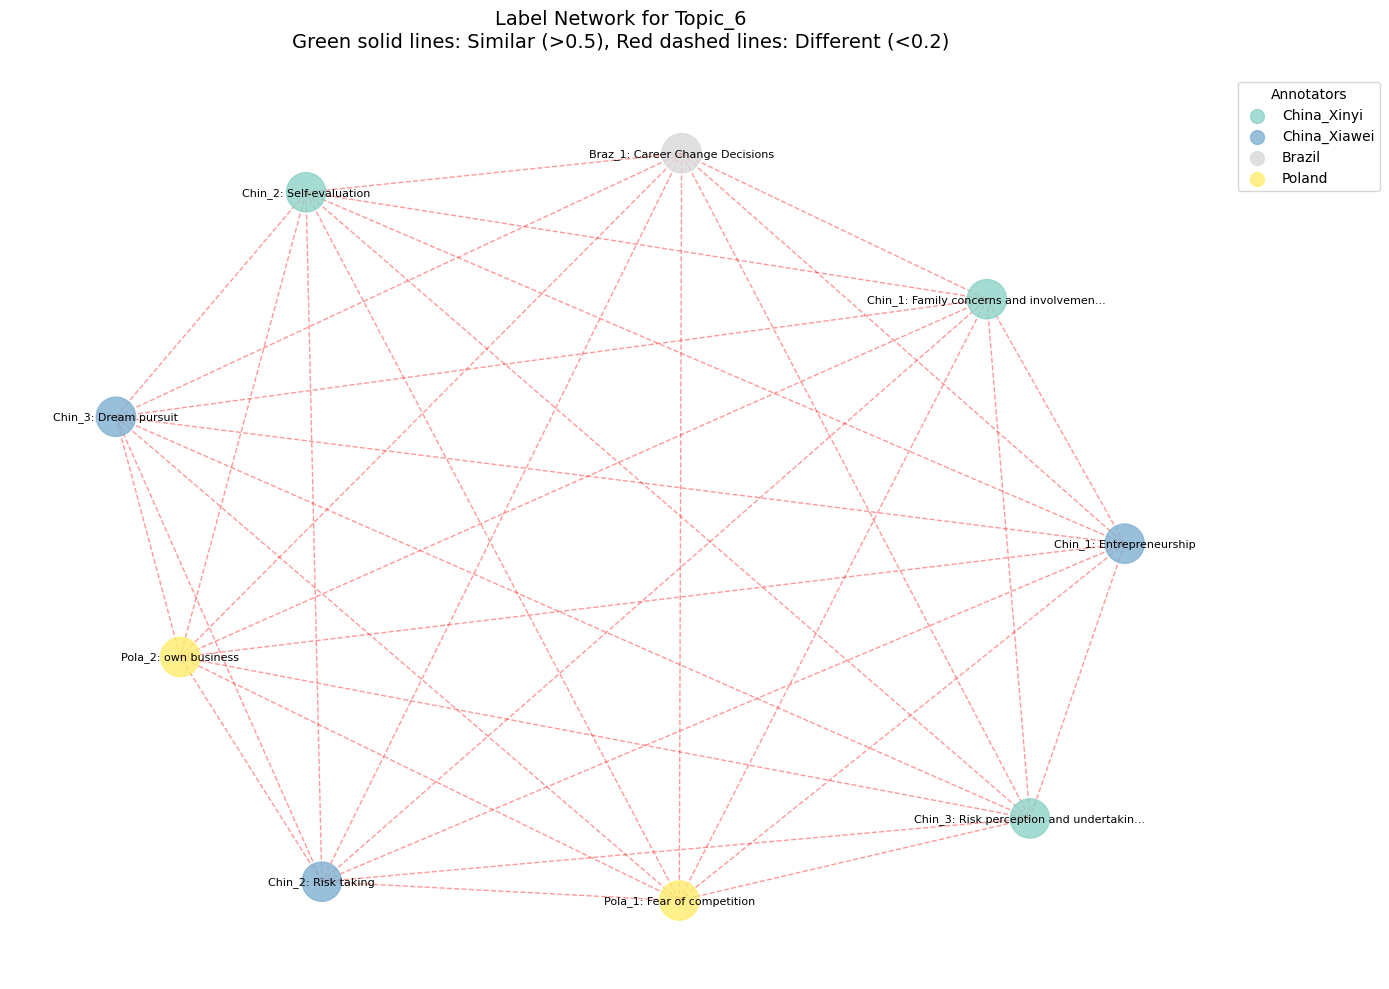


Topic_6 Statistics:
  Total labels: 9
  Similar pairs: 0
  Different pairs: 36

  Most similar labels:

  Most different labels:
    - 'Career Change Decisions...' vs 'Entrepreneurship...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Career Change Decisions...' vs 'Risk taking...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Career Change Decisions...' vs 'Dream pursuit...'
      (Brazil vs China_Xiawei, similarity: 0.000)


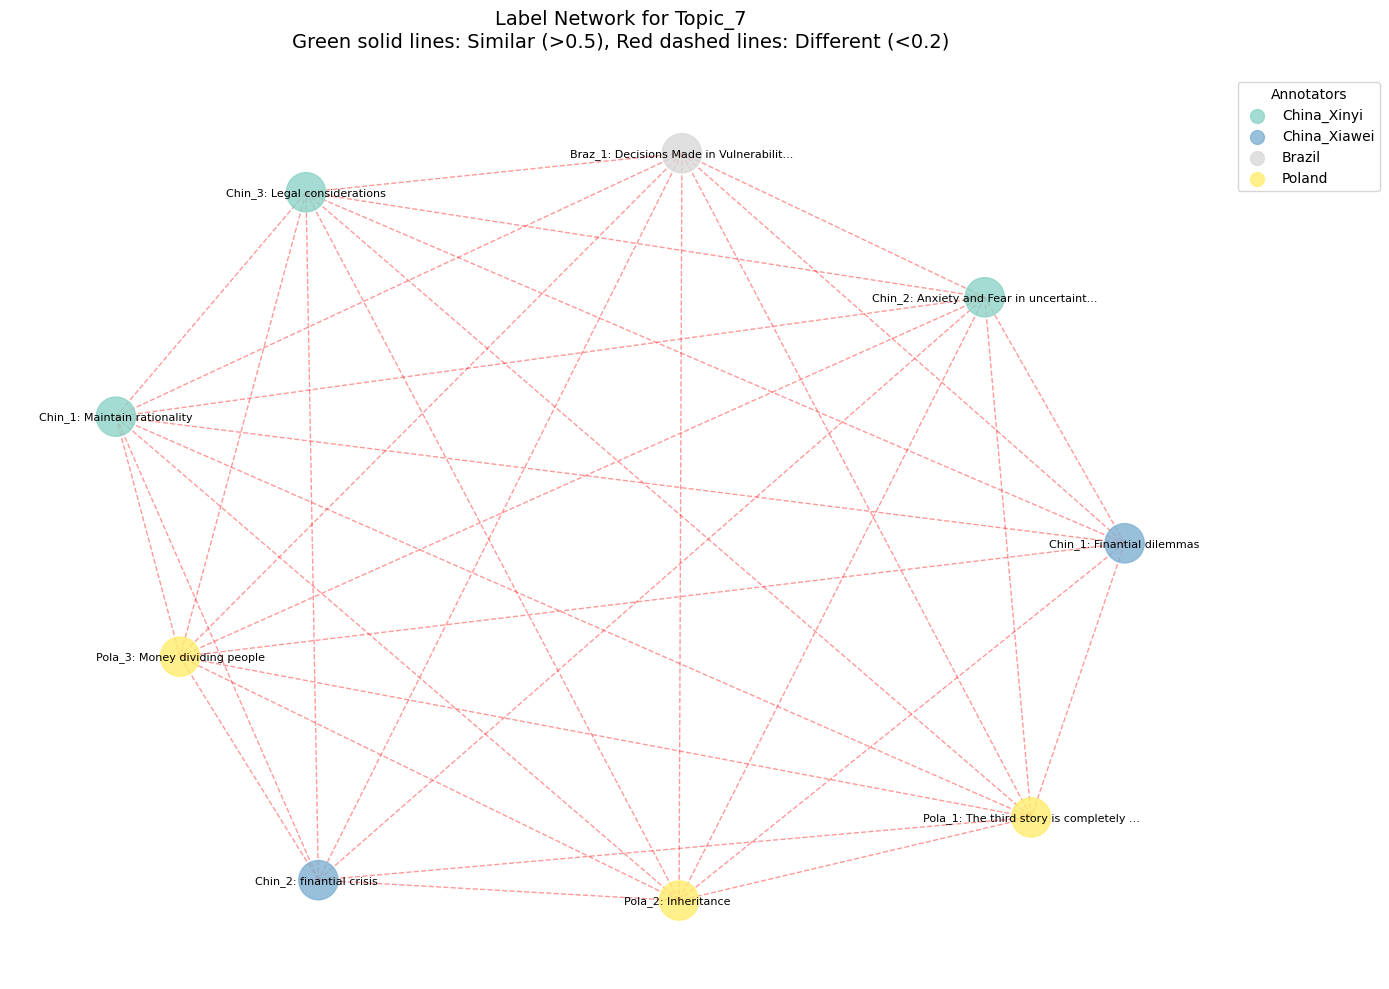


Topic_7 Statistics:
  Total labels: 9
  Similar pairs: 0
  Different pairs: 35

  Most similar labels:

  Most different labels:
    - 'Decisions Made in Vulnerability...' vs 'Finantial dilemmas...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Decisions Made in Vulnerability...' vs 'finantial crisis ...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Decisions Made in Vulnerability...' vs 'Maintain rationality...'
      (Brazil vs China_Xinyi, similarity: 0.000)


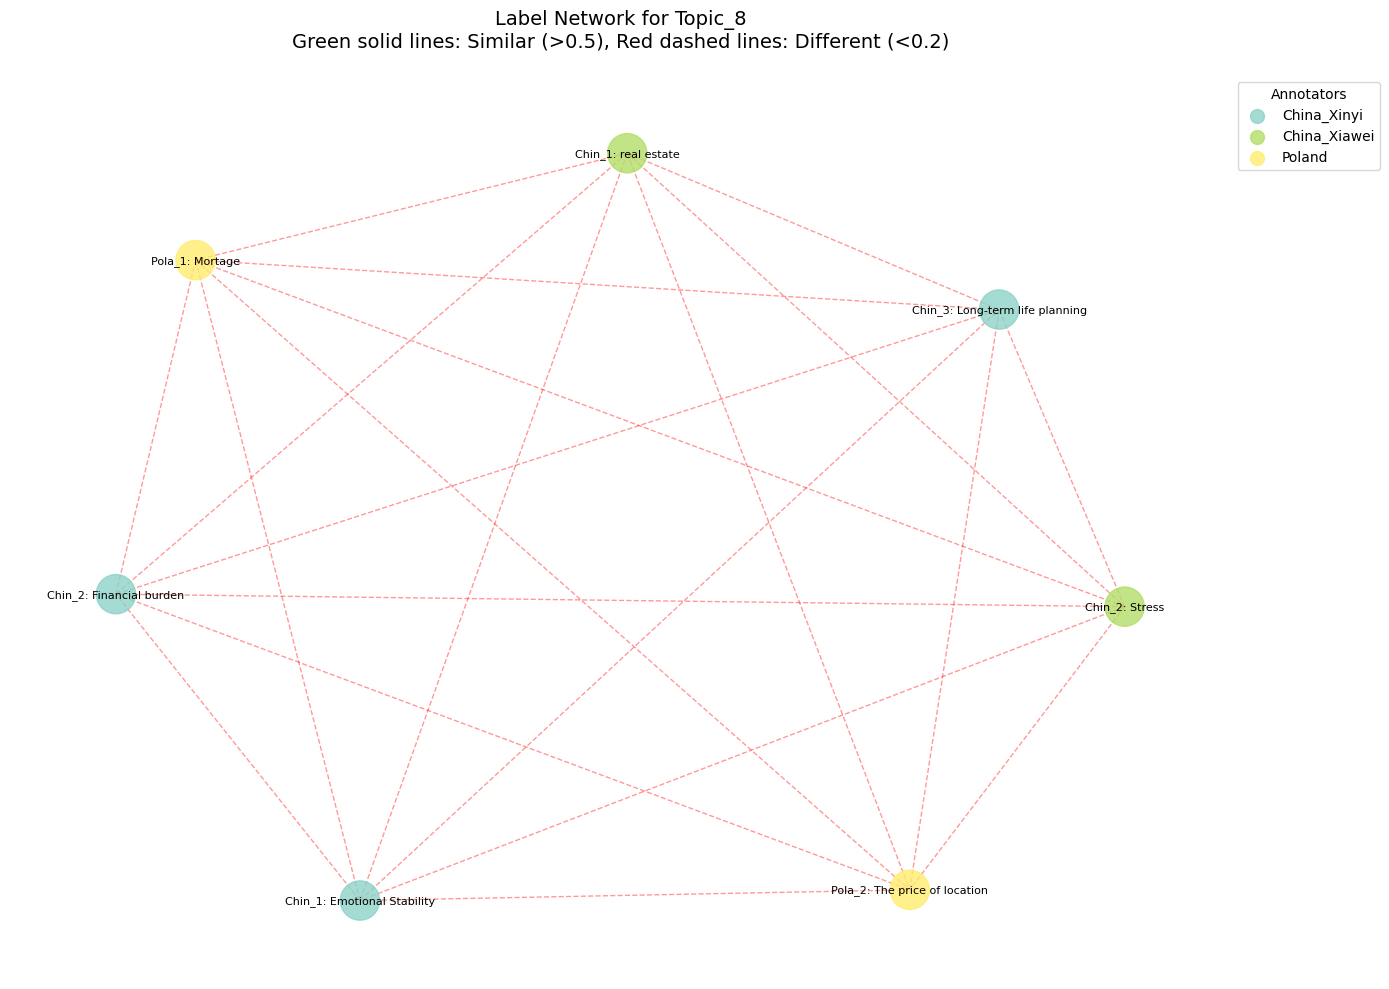


Topic_8 Statistics:
  Total labels: 7
  Similar pairs: 0
  Different pairs: 21

  Most similar labels:

  Most different labels:
    - 'real estate...' vs 'Stress...'
      (China_Xiawei vs China_Xiawei, similarity: 0.000)
    - 'real estate...' vs 'Emotional Stability...'
      (China_Xiawei vs China_Xinyi, similarity: 0.000)
    - 'real estate...' vs 'Financial burden...'
      (China_Xiawei vs China_Xinyi, similarity: 0.000)


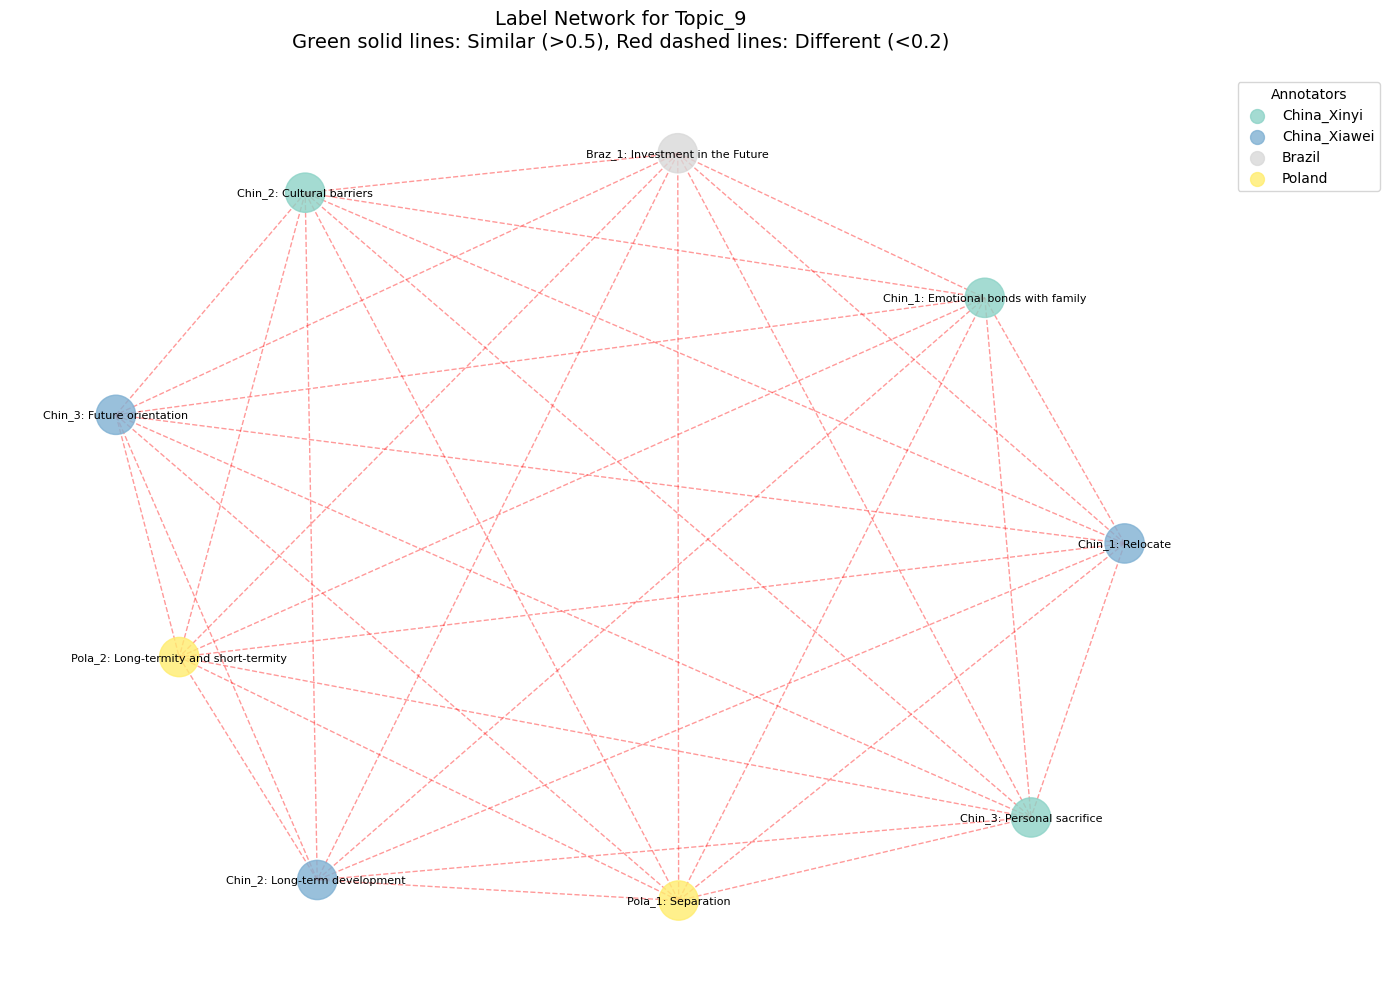


Topic_9 Statistics:
  Total labels: 9
  Similar pairs: 0
  Different pairs: 36

  Most similar labels:

  Most different labels:
    - 'Investment in the Future...' vs 'Relocate...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Investment in the Future...' vs 'Long-term development ...'
      (Brazil vs China_Xiawei, similarity: 0.000)
    - 'Investment in the Future...' vs 'Emotional bonds with family...'
      (Brazil vs China_Xinyi, similarity: 0.000)


Creating similarity matrices for all topics...


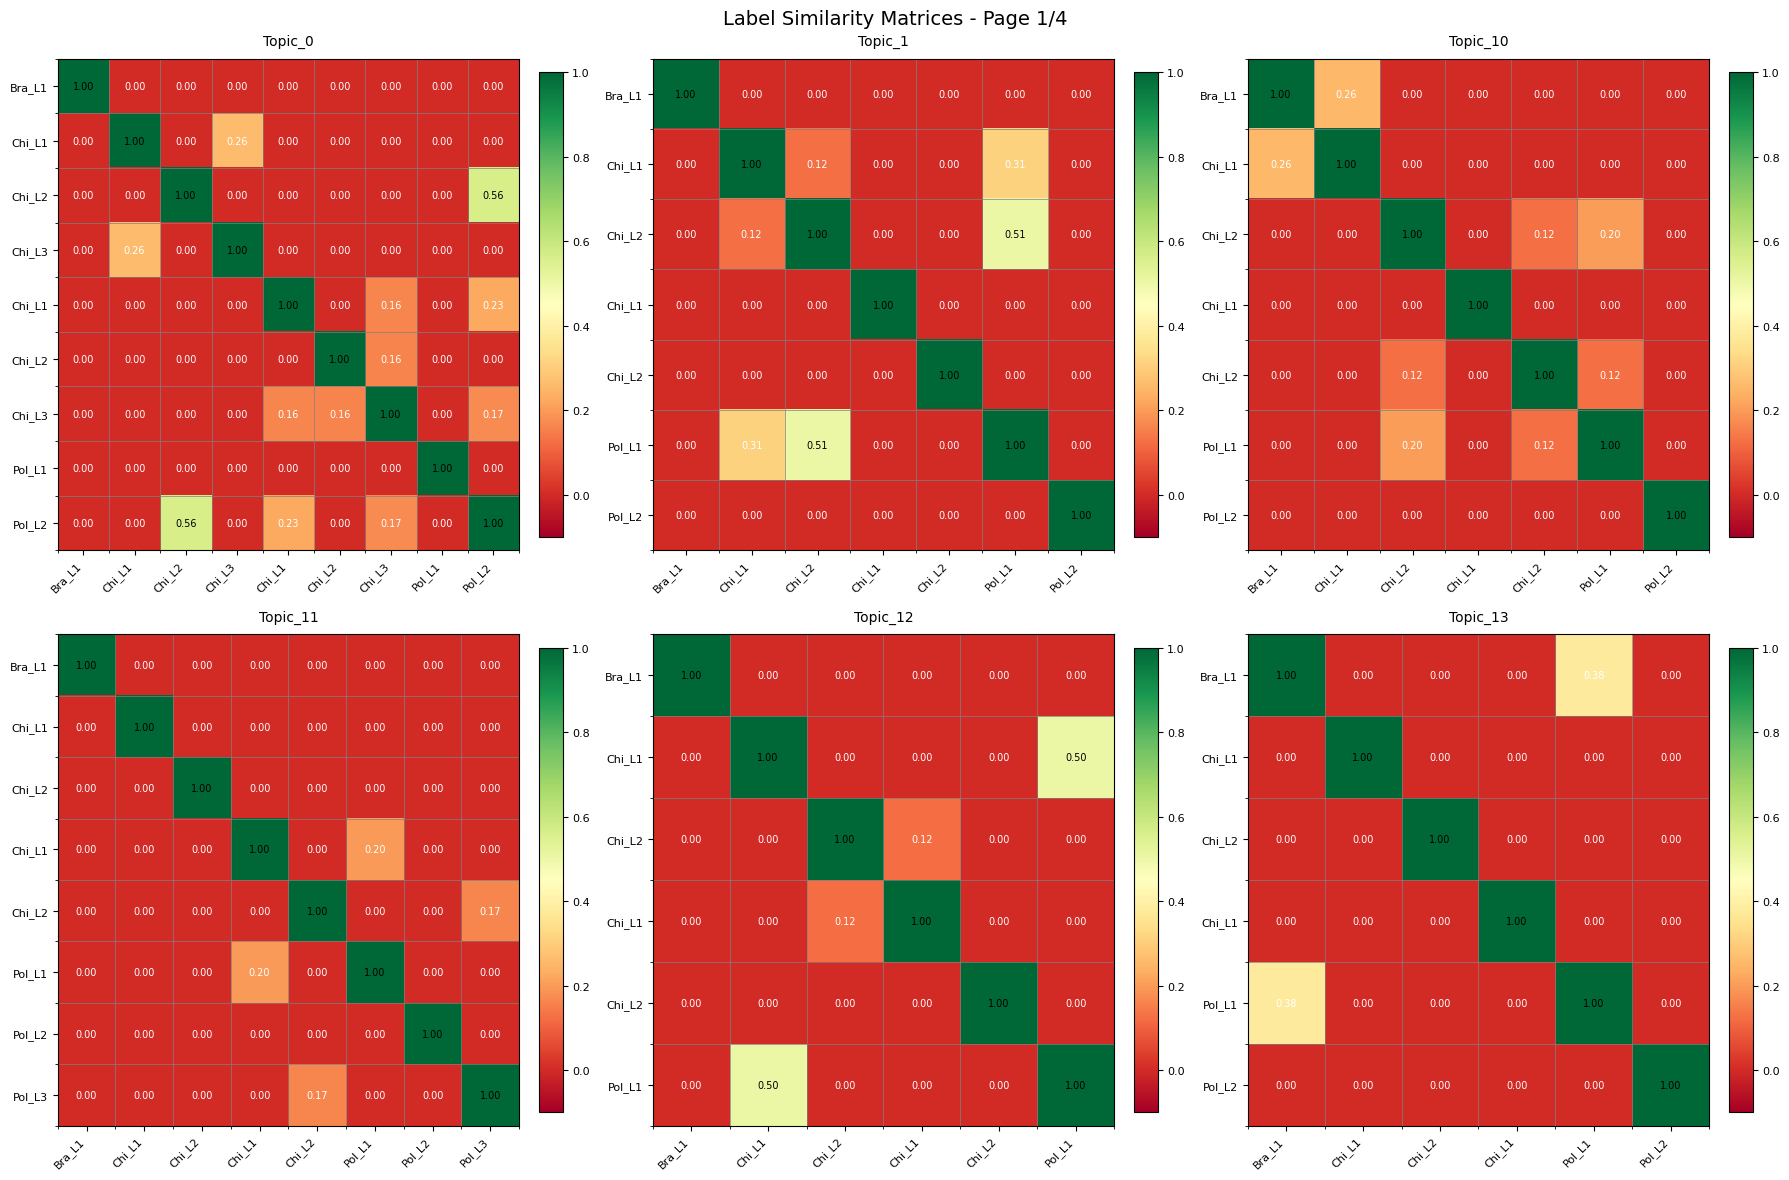

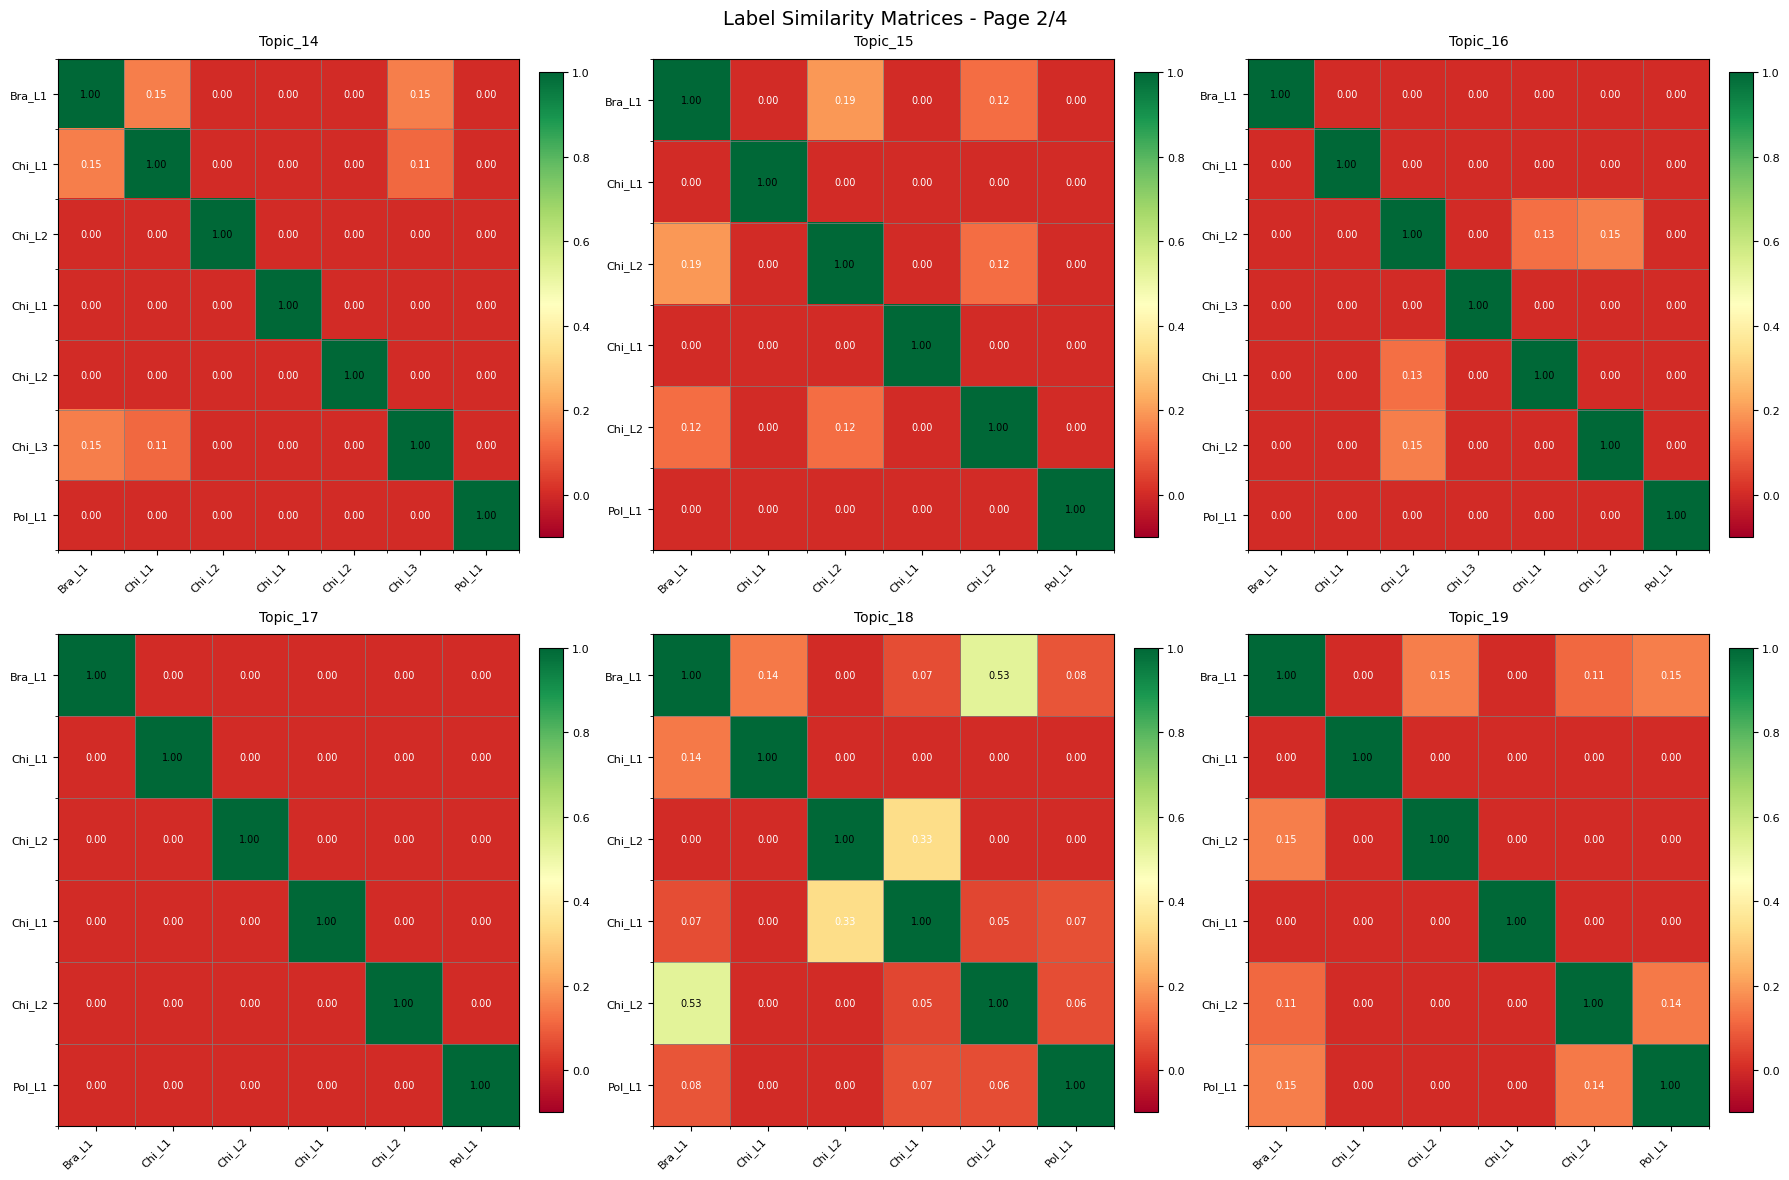

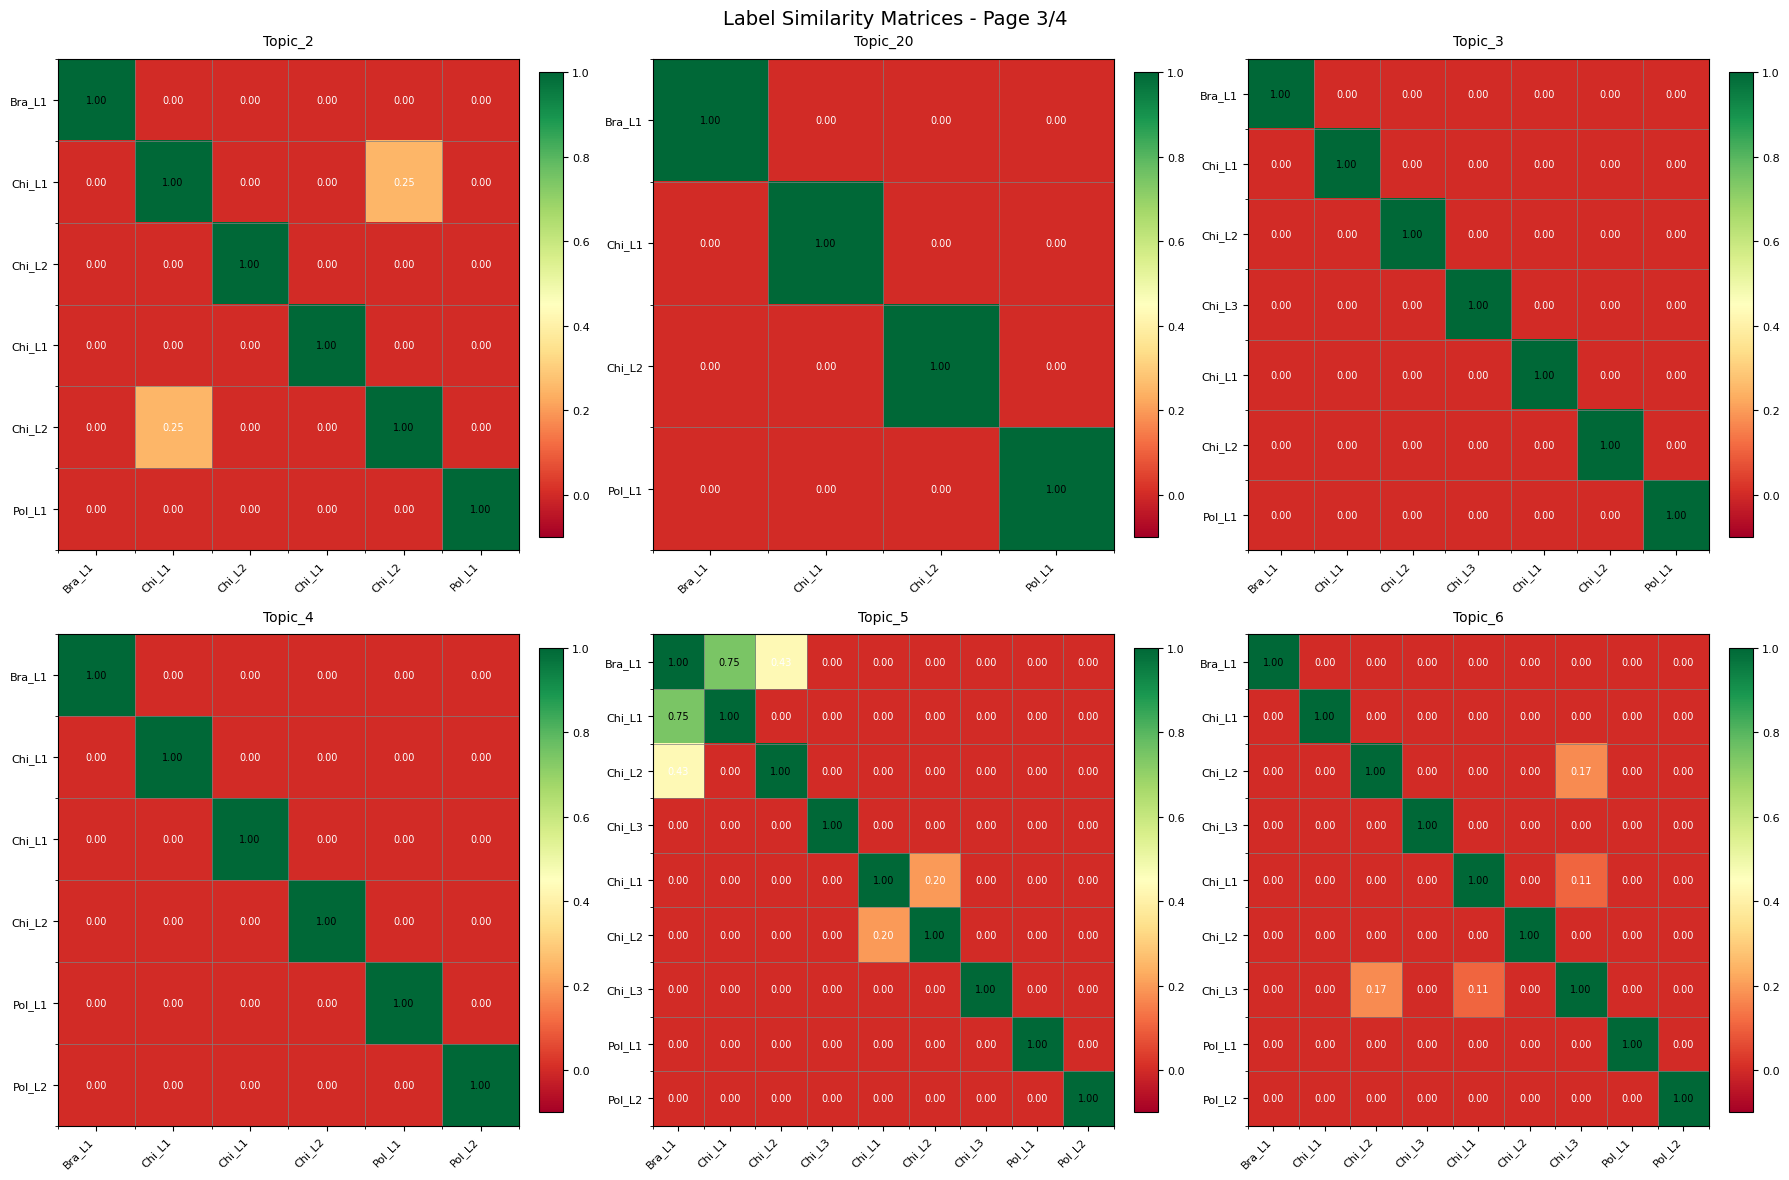

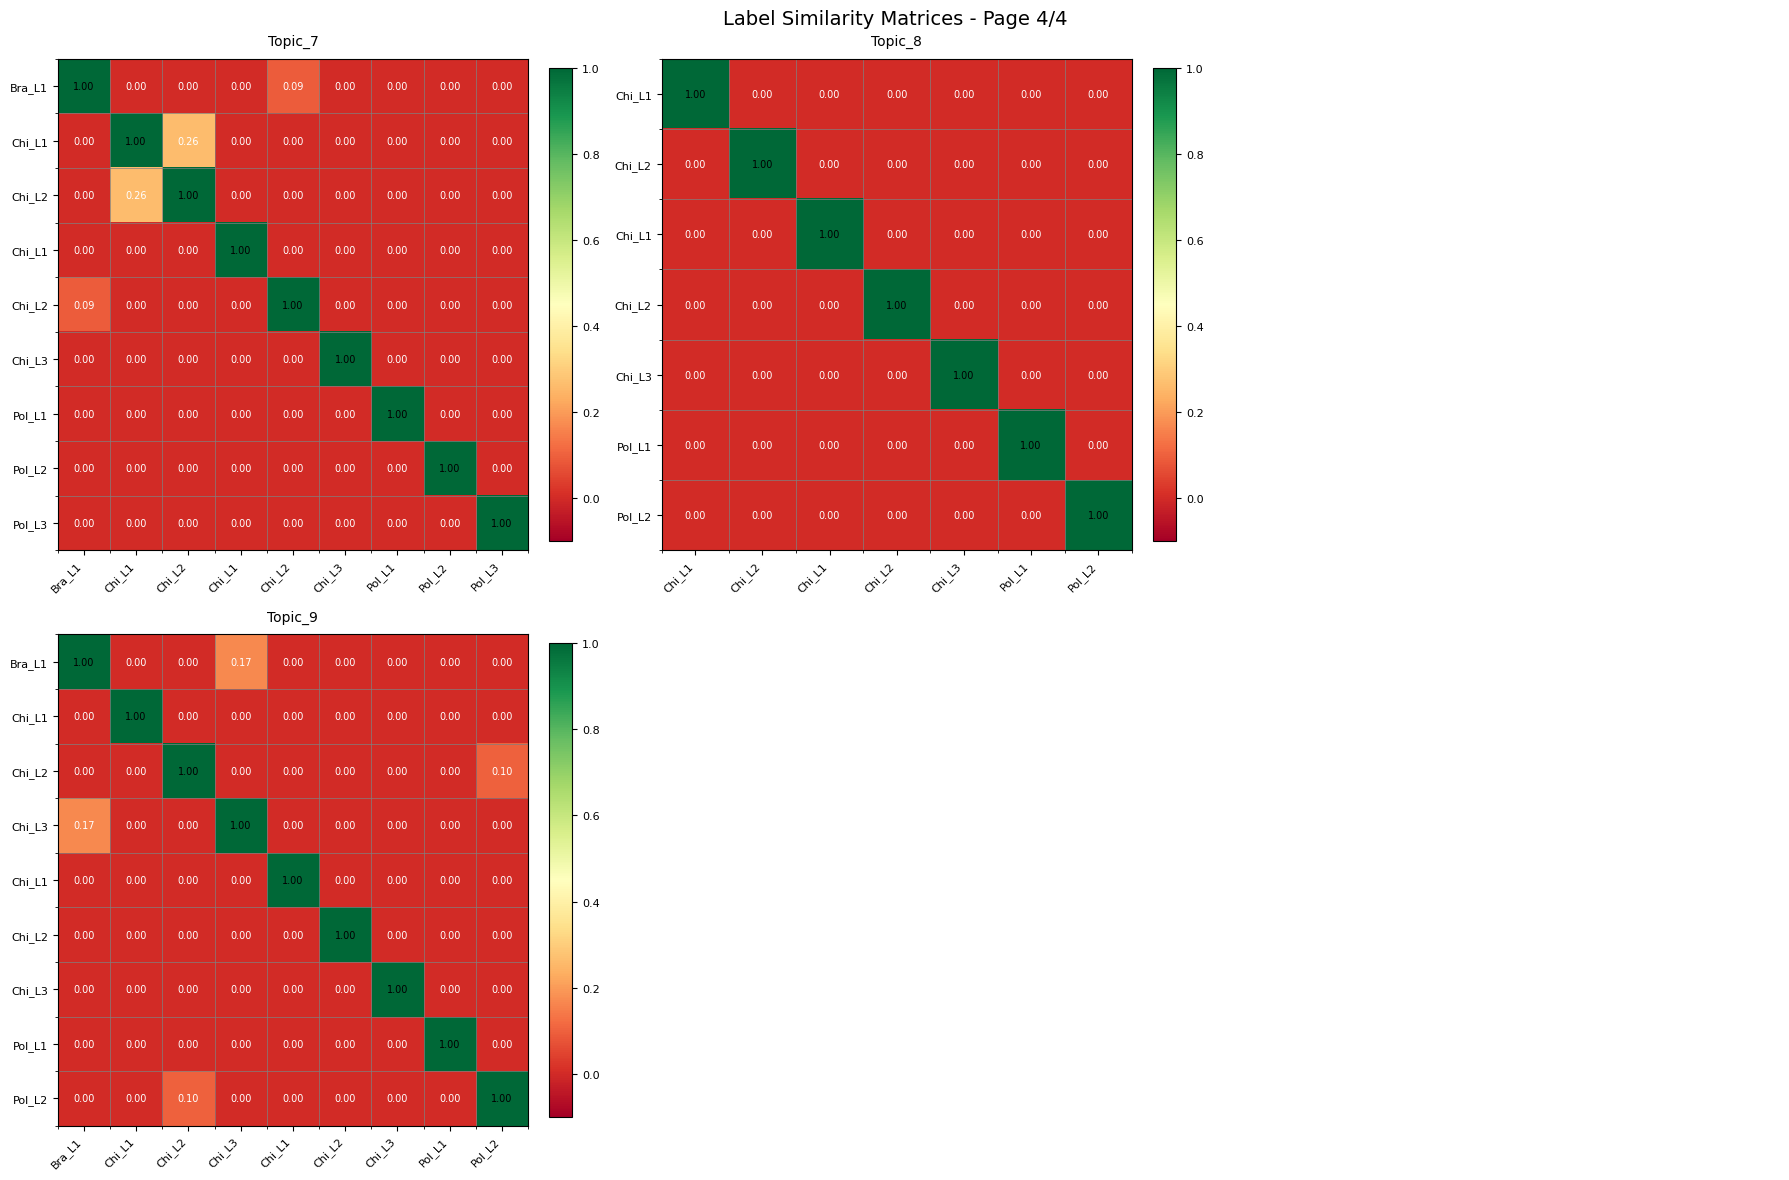



Creating summary network of all similar labels...


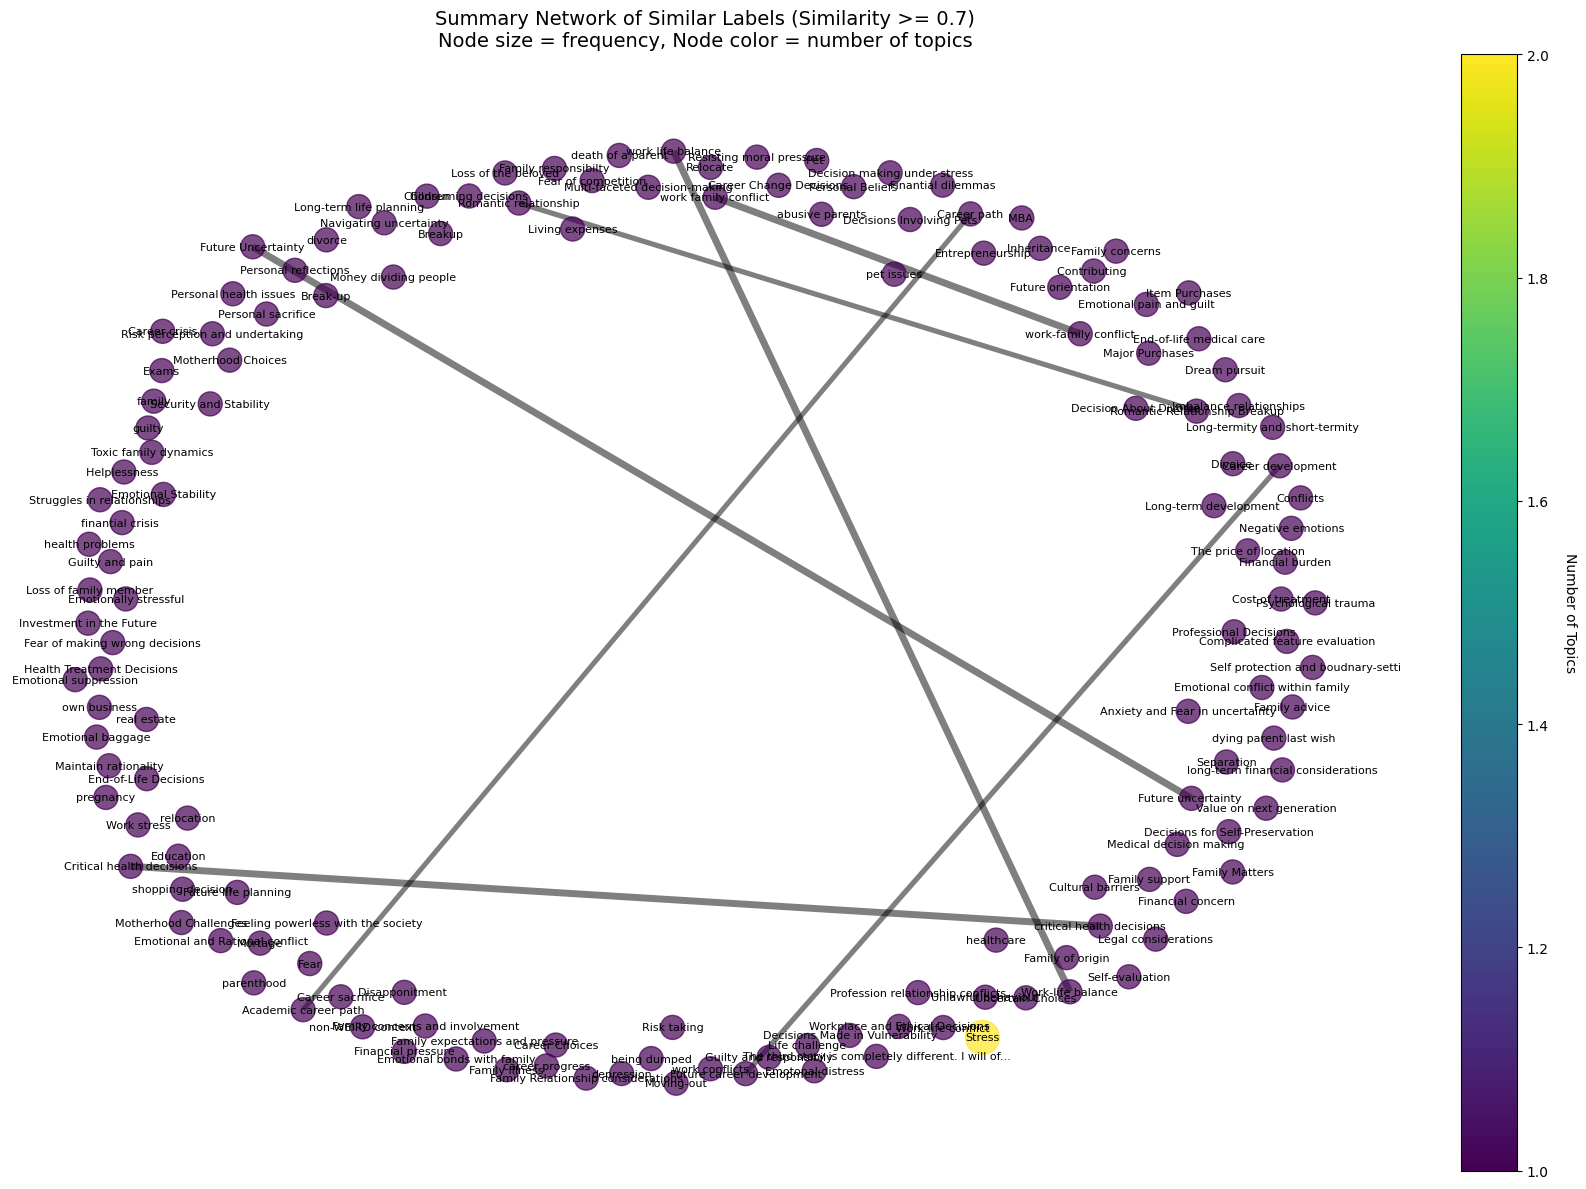

In [68]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

def create_topic_networks(summary_df, similarity_threshold=0.5, difference_threshold=0.2):
    """Create network visualization for each topic showing similar and different labels"""
    
    # Get unique topics
    topics = sorted(summary_df['Topic'].unique())
    
    # Process each topic
    for topic in topics:
        topic_data = summary_df[summary_df['Topic'] == topic]
        
        # Collect all labels with metadata
        labels_info = []
        label_texts = []
        
        for _, row in topic_data.iterrows():
            for i, label_col in enumerate(['Label_1', 'Label_2', 'Label_3']):
                if pd.notna(row[label_col]) and row[label_col] != '':
                    label_info = {
                        'text': row[label_col],
                        'annotator': row['Annotator'],
                        'label_type': f'L{i+1}',
                        'full_label': f"{row['Annotator'][:4]}_{i+1}: {row[label_col][:30]}..."
                        if len(row[label_col]) > 30 else f"{row['Annotator'][:4]}_{i+1}: {row[label_col]}"
                    }
                    labels_info.append(label_info)
                    label_texts.append(row[label_col])
        
        if len(label_texts) < 2:
            continue
        
        # Calculate similarities
        vectorizer = TfidfVectorizer(ngram_range=(1, 2))
        try:
            tfidf_matrix = vectorizer.fit_transform(label_texts)
            similarity_matrix = cosine_similarity(tfidf_matrix)
        except:
            continue
        
        # Create network
        G = nx.Graph()
        
        # Add nodes
        for i, label_info in enumerate(labels_info):
            G.add_node(i, **label_info)
        
        # Add edges based on similarity
        similar_edges = []
        different_edges = []
        
        for i in range(len(labels_info)):
            for j in range(i+1, len(labels_info)):
                sim = similarity_matrix[i][j]
                
                if sim > similarity_threshold:
                    G.add_edge(i, j, weight=sim, edge_type='similar')
                    similar_edges.append((i, j))
                elif sim < difference_threshold:
                    G.add_edge(i, j, weight=sim, edge_type='different')
                    different_edges.append((i, j))
        
        # Create visualization
        plt.figure(figsize=(14, 10))
        
        # Use spring layout with high k value to spread nodes
        pos = nx.spring_layout(G, k=3, iterations=50, seed=42)
        
        # Draw nodes with colors based on annotator
        annotators = list(set([info['annotator'] for info in labels_info]))
        colors = plt.cm.Set3(np.linspace(0, 1, len(annotators)))
        annotator_colors = dict(zip(annotators, colors))
        
        node_colors = [annotator_colors[labels_info[node]['annotator']] for node in G.nodes()]
        
        # Draw the network
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                              node_size=800, alpha=0.8)
        
        # Draw similar edges (thick, green)
        if similar_edges:
            nx.draw_networkx_edges(G, pos, edgelist=similar_edges,
                                  width=3, alpha=0.6, edge_color='green',
                                  style='solid')
        
        # Draw different edges (thin, red, dashed)
        if different_edges:
            nx.draw_networkx_edges(G, pos, edgelist=different_edges,
                                  width=1, alpha=0.4, edge_color='red',
                                  style='dashed')
        
        # Draw labels
        labels = {i: labels_info[i]['full_label'] for i in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=8)
        
        # Add title and legend
        plt.title(f'Label Network for {topic}\n' + 
                 f'Green solid lines: Similar (>{similarity_threshold}), ' +
                 f'Red dashed lines: Different (<{difference_threshold})',
                 fontsize=14, pad=20)
        
        # Create legend for annotators
        legend_elements = []
        for annotator, color in annotator_colors.items():
            legend_elements.append(plt.scatter([], [], c=[color], s=100, 
                                             label=annotator, alpha=0.8))
        
        plt.legend(handles=legend_elements, title='Annotators', 
                  loc='upper left', bbox_to_anchor=(1, 1))
        
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        # Print statistics for this topic
        print(f"\n{topic} Statistics:")
        print(f"  Total labels: {len(labels_info)}")
        print(f"  Similar pairs: {len(similar_edges)}")
        print(f"  Different pairs: {len(different_edges)}")
        
        # Find and print the most similar and different pairs
        if similar_edges or different_edges:
            print(f"\n  Most similar labels:")
            similar_pairs = [(i, j, similarity_matrix[i][j]) for i, j in similar_edges]
            similar_pairs.sort(key=lambda x: x[2], reverse=True)
            for i, j, sim in similar_pairs[:3]:
                print(f"    - '{labels_info[i]['text'][:40]}...' vs '{labels_info[j]['text'][:40]}...'")
                print(f"      ({labels_info[i]['annotator']} vs {labels_info[j]['annotator']}, similarity: {sim:.3f})")
            
            if different_edges:
                print(f"\n  Most different labels:")
                different_pairs = [(i, j, similarity_matrix[i][j]) for i, j in different_edges]
                different_pairs.sort(key=lambda x: x[2])
                for i, j, sim in different_pairs[:3]:
                    print(f"    - '{labels_info[i]['text'][:40]}...' vs '{labels_info[j]['text'][:40]}...'")
                    print(f"      ({labels_info[i]['annotator']} vs {labels_info[j]['annotator']}, similarity: {sim:.3f})")

def create_topic_similarity_matrices(summary_df, topics_per_page=6):
    """Create similarity matrices showing all pairwise similarities for each topic"""
    
    topics = sorted(summary_df['Topic'].unique())
    n_pages = (len(topics) + topics_per_page - 1) // topics_per_page
    
    for page in range(n_pages):
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        start_idx = page * topics_per_page
        end_idx = min(start_idx + topics_per_page, len(topics))
        
        for idx, topic_idx in enumerate(range(start_idx, end_idx)):
            topic = topics[topic_idx]
            topic_data = summary_df[summary_df['Topic'] == topic]
            
            # Collect labels
            labels_info = []
            label_texts = []
            display_labels = []
            
            for _, row in topic_data.iterrows():
                for i, label_col in enumerate(['Label_1', 'Label_2', 'Label_3']):
                    if pd.notna(row[label_col]) and row[label_col] != '':
                        label_texts.append(row[label_col])
                        display_labels.append(f"{row['Annotator'][:3]}_L{i+1}")
            
            if len(label_texts) > 1:
                # Calculate similarities
                vectorizer = TfidfVectorizer(ngram_range=(1, 2))
                try:
                    tfidf_matrix = vectorizer.fit_transform(label_texts)
                    similarity_matrix = cosine_similarity(tfidf_matrix)
                    
                    # Create heatmap
                    im = axes[idx].imshow(similarity_matrix, cmap='RdYlGn', 
                                         vmin=-0.1, vmax=1, aspect='auto')
                    
                    # Add colorbar
                    cbar = plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)
                    cbar.ax.tick_params(labelsize=8)
                    
                    # Set ticks and labels
                    axes[idx].set_xticks(range(len(display_labels)))
                    axes[idx].set_yticks(range(len(display_labels)))
                    axes[idx].set_xticklabels(display_labels, rotation=45, ha='right', fontsize=8)
                    axes[idx].set_yticklabels(display_labels, fontsize=8)
                    
                    # Add grid
                    axes[idx].set_xticks(np.arange(len(display_labels)+1)-0.5, minor=True)
                    axes[idx].set_yticks(np.arange(len(display_labels)+1)-0.5, minor=True)
                    axes[idx].grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
                    
                    # Add text annotations for similarity values
                    for i in range(len(similarity_matrix)):
                        for j in range(len(similarity_matrix)):
                            text = axes[idx].text(j, i, f'{similarity_matrix[i, j]:.2f}',
                                                ha="center", va="center", 
                                                color="white" if similarity_matrix[i, j] < 0.5 else "black",
                                                fontsize=7)
                    
                    axes[idx].set_title(f'{topic}', fontsize=10, pad=10)
                except:
                    axes[idx].axis('off')
            else:
                axes[idx].axis('off')
        
        # Turn off unused axes
        for i in range(end_idx - start_idx, len(axes)):
            axes[i].axis('off')
        
        plt.suptitle(f'Label Similarity Matrices - Page {page+1}/{n_pages}', fontsize=14)
        plt.tight_layout()
        plt.show()

def create_summary_network(summary_df, min_similarity=0.7):
    """Create a summary network showing all highly similar labels across all topics"""
    
    # Collect all unique labels with their topic and annotator info
    all_labels = {}
    label_id = 0
    
    for _, row in summary_df.iterrows():
        topic = row['Topic']
        annotator = row['Annotator']
        
        for i, label_col in enumerate(['Label_1', 'Label_2', 'Label_3']):
            if pd.notna(row[label_col]) and row[label_col] != '':
                label_key = (row[label_col], topic, annotator)
                if label_key not in all_labels:
                    all_labels[label_key] = {
                        'id': label_id,
                        'text': row[label_col],
                        'topic': topic,
                        'annotator': annotator,
                        'label_type': f'L{i+1}'
                    }
                    label_id += 1
    
    # Get unique label texts
    unique_texts = list(set(info['text'] for info in all_labels.values()))
    
    if len(unique_texts) < 2:
        print("Not enough unique labels for summary network")
        return
    
    # Calculate similarities between unique texts
    vectorizer = TfidfVectorizer(ngram_range=(1, 2))
    tfidf_matrix = vectorizer.fit_transform(unique_texts)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    # Create network of highly similar labels
    G = nx.Graph()
    
    # Add nodes for each unique label text
    for i, text in enumerate(unique_texts):
        # Find all instances of this label
        instances = [info for info in all_labels.values() if info['text'] == text]
        topics = list(set(inst['topic'] for inst in instances))
        annotators = list(set(inst['annotator'] for inst in instances))
        
        G.add_node(i, text=text[:50] + '...' if len(text) > 50 else text,
                  topics=topics, annotators=annotators,
                  count=len(instances))
    
    # Add edges for high similarity
    for i in range(len(unique_texts)):
        for j in range(i+1, len(unique_texts)):
            if similarity_matrix[i][j] >= min_similarity:
                G.add_edge(i, j, weight=similarity_matrix[i][j])
    
    # Create visualization
    plt.figure(figsize=(16, 12))
    
    # Layout
    pos = nx.spring_layout(G, k=4, iterations=50)
    
    # Node sizes based on frequency
    node_sizes = [G.nodes[node]['count'] * 300 for node in G.nodes()]
    
    # Node colors based on number of topics
    node_colors = [len(G.nodes[node]['topics']) for node in G.nodes()]
    
    # Draw network
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                          node_color=node_colors, cmap='viridis',
                          alpha=0.7)
    
    # Draw edges with varying thickness
    edges = G.edges()
    weights = [G[u][v]['weight'] * 5 for u, v in edges]
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5)
    
    # Draw labels
    labels = {node: G.nodes[node]['text'] for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=8)
    
    plt.title(f'Summary Network of Similar Labels (Similarity >= {min_similarity})\n' +
             'Node size = frequency, Node color = number of topics',
             fontsize=14)
    plt.axis('off')
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis', 
                               norm=plt.Normalize(vmin=min(node_colors), 
                                                vmax=max(node_colors)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=plt.gca(), fraction=0.046, pad=0.04)
    cbar.set_label('Number of Topics', rotation=270, labelpad=20)
    
    plt.tight_layout()
    plt.show()

# Run the visualizations
print("Creating network visualizations for each topic...")
create_topic_networks(summary_df, similarity_threshold=0.5, difference_threshold=0.2)

print("\n\nCreating similarity matrices for all topics...")
create_topic_similarity_matrices(summary_df)

print("\n\nCreating summary network of all similar labels...")
create_summary_network(summary_df, min_similarity=0.7)